In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
#import pandas.util.testing as tm
%matplotlib inline

In [2]:
df = pd.read_excel("E Commerce Dataset.xlsx",sheet_name="E Comm")

In [3]:
df.shape

(5630, 20)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [50]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,5630,NaN,NaN,NaN,52815.5,1625.39,50001,51408.2,52815.5,54222.8,55630
Churn,5630,NaN,NaN,NaN,0.168384,0.37424,0,0,0,0,1
Tenure,5366,NaN,NaN,NaN,10.1899,8.55724,0,2,9,16,61
PreferredLoginDevice,5630,3,Mobile Phone,2765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,5630,NaN,NaN,NaN,1.65471,0.915389,1,1,1,3,3
WarehouseToHome,5379,NaN,NaN,NaN,15.6399,8.53148,5,9,14,20,127
PreferredPaymentMode,5630,7,Debit Card,2314,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,5630,2,Male,3384,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HourSpendOnApp,5375,NaN,NaN,NaN,2.93153,0.721926,0,2,3,3,5
NumberOfDeviceRegistered,5630,NaN,NaN,NaN,3.68899,1.024,1,3,4,4,6


In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


In [52]:
df['Tenure'].mean()

10.189899366380917

In [53]:
df['Tenure'].median()

9.0

In [54]:
df['PreferredLoginDevice'].mode()

0    Mobile Phone
dtype: object

In [55]:
df['CashbackAmount'].mean()

177.22303019538157

In [56]:
df['CashbackAmount'].var()

2421.3324091143777

In [57]:
df['CashbackAmount'].std()

49.20703617486404

In [58]:
df['CashbackAmount'].skew()

1.1498457194574931

In [59]:
df.skew()

CustomerID                     0.000000
Churn                          1.772843
Tenure                         0.736513
CityTier                       0.735326
WarehouseToHome                1.619154
HourSpendOnApp                -0.027213
NumberOfDeviceRegistered      -0.396969
SatisfactionScore             -0.142626
NumberOfAddress                1.088639
Complain                       0.953347
OrderAmountHikeFromlastYear    0.790785
CouponUsed                     2.545653
OrderCount                     2.196414
DaySinceLastOrder              1.191000
CashbackAmount                 1.149846
dtype: float64

In [60]:
# Checking for Duplicate records
dups = df.duplicated()
dups.sum()

0

In [61]:
miss_val=df.isnull().sum().sort_values(ascending = False)
miss_val

DaySinceLastOrder              307
OrderAmountHikeFromlastYear    265
Tenure                         264
OrderCount                     258
CouponUsed                     256
HourSpendOnApp                 255
WarehouseToHome                251
CashbackAmount                   0
PreferredPaymentMode             0
Churn                            0
PreferredLoginDevice             0
CityTier                         0
NumberOfDeviceRegistered         0
Gender                           0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
CustomerID                       0
dtype: int64

In [62]:
# Percentage of missing values
miss_val/len(df)

DaySinceLastOrder              0.054529
OrderAmountHikeFromlastYear    0.047069
Tenure                         0.046892
OrderCount                     0.045826
CouponUsed                     0.045471
HourSpendOnApp                 0.045293
WarehouseToHome                0.044583
CashbackAmount                 0.000000
PreferredPaymentMode           0.000000
Churn                          0.000000
PreferredLoginDevice           0.000000
CityTier                       0.000000
NumberOfDeviceRegistered       0.000000
Gender                         0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
CustomerID                     0.000000
dtype: float64

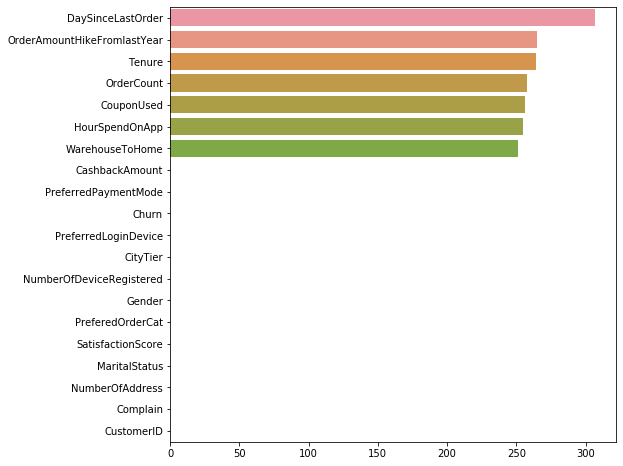

In [63]:
fig,axes = plt.subplots(figsize = (8,8))
sns.barplot(y = miss_val.index,x = miss_val.values,ci=0)

In [64]:
# Checking the Levels of the categorical variables
cat_var = ['Churn','PreferredLoginDevice','CityTier','PreferredPaymentMode',
           'Gender','PreferedOrderCat','MaritalStatus','Complain']
for i in cat_var:
    print(i)
    print(df[i].unique())
    print()

Churn
[1 0]

PreferredLoginDevice
['Mobile Phone' 'Phone' 'Computer']

CityTier
[3 1 2]

PreferredPaymentMode
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

Gender
['Female' 'Male']

PreferedOrderCat
['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

MaritalStatus
['Single' 'Divorced' 'Married']

Complain
[1 0]



In [4]:
df_1 = df.copy()
df_1['Churn'] = df_1['Churn'].apply(lambda x : 'Yes' if x == 1 else 'No')
df_1['CityTier'] = df_1['CityTier'].apply(lambda x: 'Tier-1' if x == 1 else ('Tier-2' if x == 2 else 'Tier-3'))
df_1['Complain'] = df_1['Complain'].apply(lambda x: 'Yes' if x == 1 else 'No')

In [5]:
# Checking the Levels of the categorical variables
cat_var = ['Churn','PreferredLoginDevice','CityTier','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus',
         'Complain']
for i in cat_var:
    print(i)
    print(df_1[i].unique())
    print()

Churn
['Yes' 'No']

PreferredLoginDevice
['Mobile Phone' 'Phone' 'Computer']

CityTier
['Tier-3' 'Tier-1' 'Tier-2']

PreferredPaymentMode
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

Gender
['Female' 'Male']

PreferedOrderCat
['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

MaritalStatus
['Single' 'Divorced' 'Married']

Complain
['Yes' 'No']



In [6]:
df_1['PreferredLoginDevice'] = df_1['PreferredLoginDevice'].apply(lambda x: 'Mobile Phone' if x == 'Phone' else x)
df_1['PreferredPaymentMode'] = df_1['PreferredPaymentMode'].apply(lambda x: 'Credit Card' if x == 'CC' else x)
df_1['PreferredPaymentMode'] = df_1['PreferredPaymentMode'].apply(lambda x: 'COD' if x == 'Cash on Delivery' else x)
df_1['PreferedOrderCat'] = df_1['PreferedOrderCat'].apply(lambda x: 'Mobile' if x == 'Mobile Phone' else x)

In [7]:
# Checking the Levels of the categorical variables
cat_var = ['Churn','PreferredLoginDevice','CityTier','PreferredPaymentMode',
           'Gender','PreferedOrderCat','MaritalStatus','Complain']
for i in cat_var:
    print(i)
    print(df_1[i].unique())
    print()

Churn
['Yes' 'No']

PreferredLoginDevice
['Mobile Phone' 'Computer']

CityTier
['Tier-3' 'Tier-1' 'Tier-2']

PreferredPaymentMode
['Debit Card' 'UPI' 'Credit Card' 'COD' 'E wallet']

Gender
['Female' 'Male']

PreferedOrderCat
['Laptop & Accessory' 'Mobile' 'Others' 'Fashion' 'Grocery']

MaritalStatus
['Single' 'Divorced' 'Married']

Complain
['Yes' 'No']



In [8]:
df_2['Churn'].value_counts()

NameError: name 'df_2' is not defined

In [8]:
from sklearn.impute import SimpleImputer
df_1_num = df_1[['CustomerID', 'Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount']]
imp = SimpleImputer(strategy = 'median')
df_1_num_imputed = pd.DataFrame(imp.fit_transform(df_1_num),columns = ['CustomerID', 
       'Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'])

In [9]:
df_2 = df_1_num_imputed.join(df_1[cat_var])

In [10]:
df_2.isnull().sum()

CustomerID                     0
Tenure                         0
WarehouseToHome                0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
SatisfactionScore              0
NumberOfAddress                0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
Churn                          0
PreferredLoginDevice           0
CityTier                       0
PreferredPaymentMode           0
Gender                         0
PreferedOrderCat               0
MaritalStatus                  0
Complain                       0
dtype: int64

In [11]:
# Before we go into the EDA part let us remove the Customer ID variable as it is a unique identifier 
df_2.drop('CustomerID',axis=1,inplace = True)

In [12]:
df_2[df_2['Churn']=='Yes'].mean()

Tenure                           3.859705
WarehouseToHome                 16.856540
HourSpendOnApp                   2.964135
NumberOfDeviceRegistered         3.934599
SatisfactionScore                3.390295
NumberOfAddress                  4.466245
OrderAmountHikeFromlastYear     15.618143
CouponUsed                       1.710970
OrderCount                       2.808017
DaySinceLastOrder                3.222574
CashbackAmount                 160.370928
dtype: float64

In [13]:
df_2[df_2['Churn']=='No'].mean()

Tenure                          11.404528
WarehouseToHome                 15.305639
HourSpendOnApp                   2.928663
NumberOfDeviceRegistered         3.639257
SatisfactionScore                3.001282
NumberOfAddress                  4.162965
OrderAmountHikeFromlastYear     15.686032
CouponUsed                       1.718069
OrderCount                       2.992952
DaySinceLastOrder                4.709739
CashbackAmount                 180.635203
dtype: float64

In [14]:
df_2[df_2['Churn']=='Yes'].median()

Tenure                           1.00
WarehouseToHome                 14.00
HourSpendOnApp                   3.00
NumberOfDeviceRegistered         4.00
SatisfactionScore                3.00
NumberOfAddress                  3.00
OrderAmountHikeFromlastYear     15.00
CouponUsed                       1.00
OrderCount                       2.00
DaySinceLastOrder                2.50
CashbackAmount                 149.66
dtype: float64

In [16]:
df_2[df_2['Churn']=='No'].median()

Tenure                          10.000
WarehouseToHome                 14.000
HourSpendOnApp                   3.000
NumberOfDeviceRegistered         4.000
SatisfactionScore                3.000
NumberOfAddress                  3.000
OrderAmountHikeFromlastYear     15.000
CouponUsed                       1.000
OrderCount                       2.000
DaySinceLastOrder                3.000
CashbackAmount                 166.115
dtype: float64

In [19]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tenure                       5630 non-null   float64
 1   WarehouseToHome              5630 non-null   float64
 2   HourSpendOnApp               5630 non-null   object 
 3   NumberOfDeviceRegistered     5630 non-null   float64
 4   SatisfactionScore            5630 non-null   float64
 5   NumberOfAddress              5630 non-null   float64
 6   OrderAmountHikeFromlastYear  5630 non-null   float64
 7   CouponUsed                   5630 non-null   float64
 8   OrderCount                   5630 non-null   float64
 9   DaySinceLastOrder            5630 non-null   float64
 10  CashbackAmount               5630 non-null   float64
 11  Churn                        5630 non-null   object 
 12  PreferredLoginDevice         5630 non-null   object 
 13  CityTier          

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


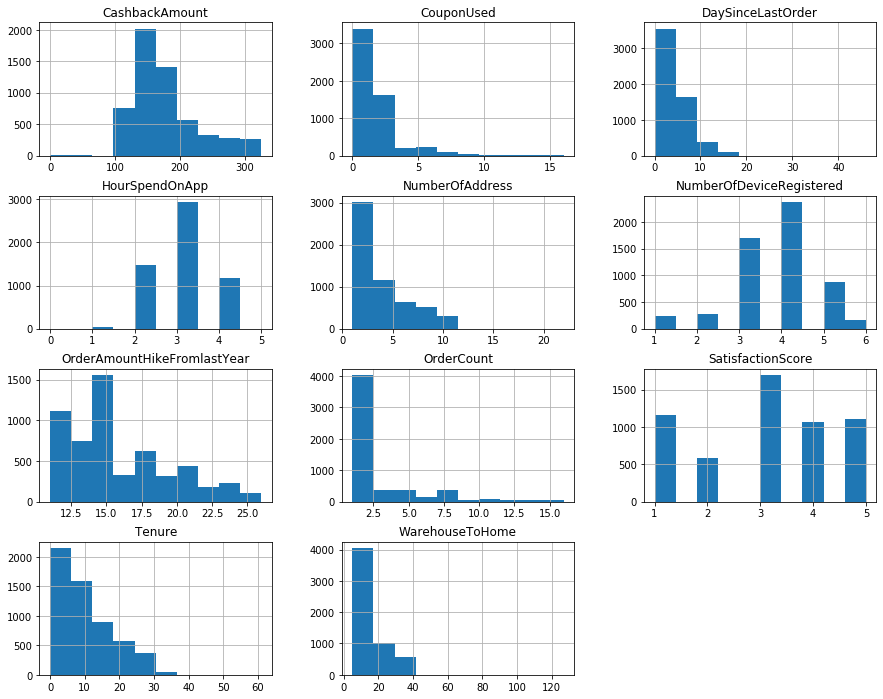

In [78]:
#taking only numerical attributes
cols=df_2.dtypes[df_2.dtypes!='object'].index #taking only numerical attributes
fig = plt.figure(figsize = (15,12)) #figure size
ax = fig.gca() #this function adds as many as subplots as required depending upon number of columns
df_2[cols].hist(ax=ax) #histogram for numerical columns where axis ax is passed 
plt.show()

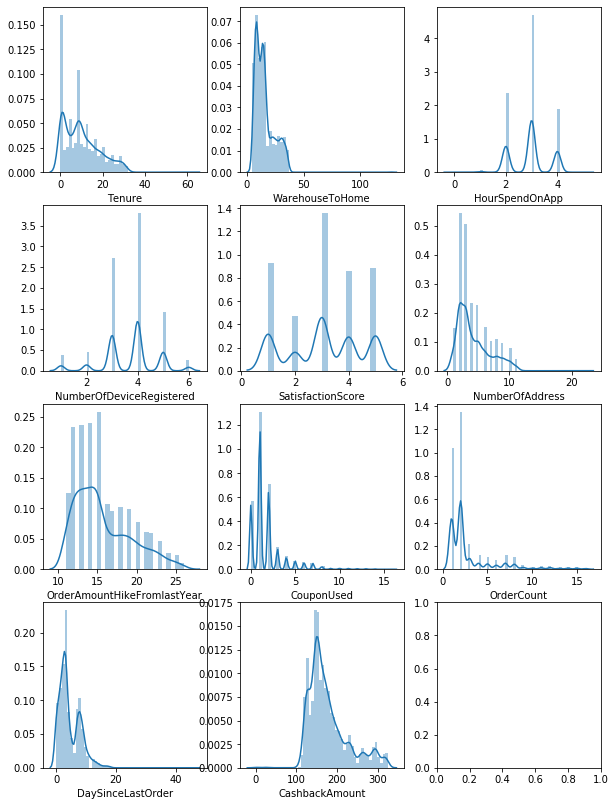

In [79]:
num = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount']
fig,axes = plt.subplots(4,3,figsize = (10,14))
for i,ax in zip(num,axes.flatten()):
    sns.distplot(df_2[i],ax=ax)

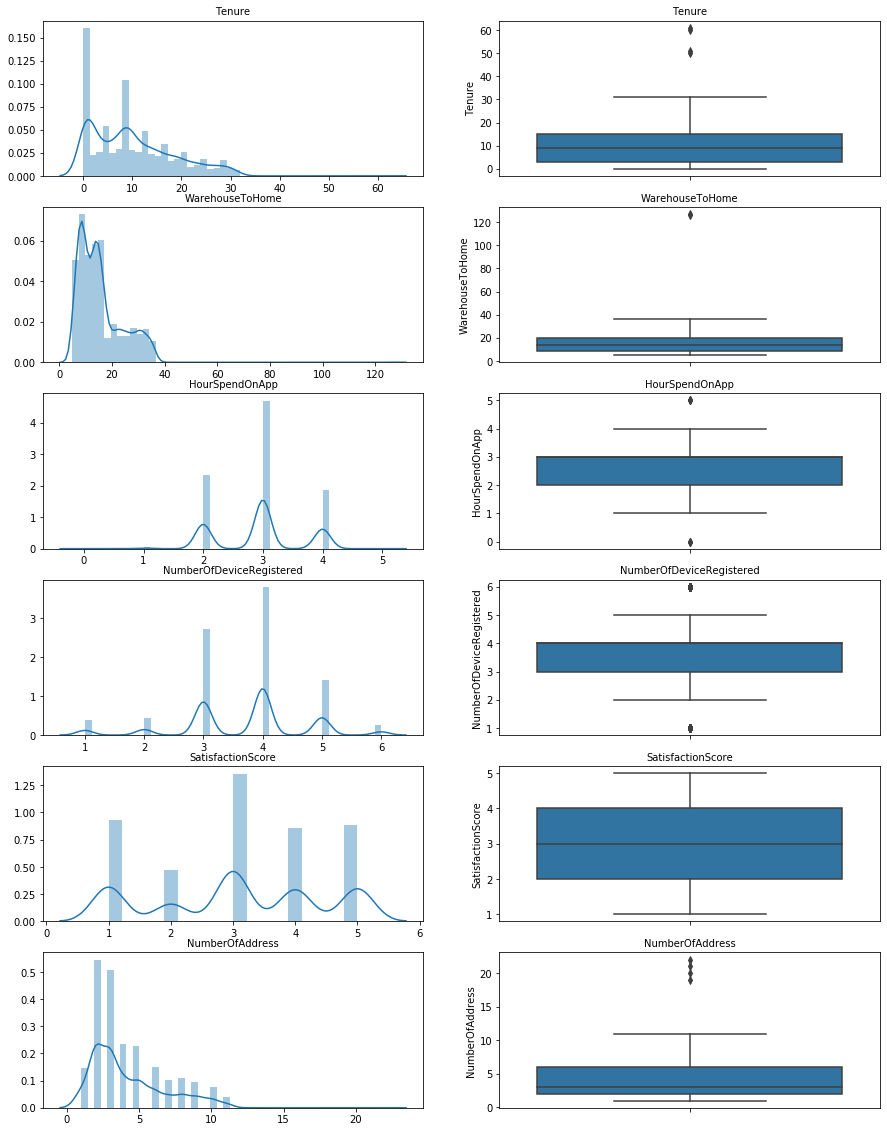

In [80]:
fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(15,20)
a = sns.distplot(df_2['Tenure'] , ax=axes[0][0],axlabel=False)
a.set_title("Tenure",fontsize=10)
a = sns.boxplot(df_2['Tenure'] , orient = "v" , ax=axes[0][1])
a.set_title("Tenure",fontsize=10)
a = sns.distplot(df_2['WarehouseToHome'] , ax=axes[1][0],axlabel=False)
a.set_title("WarehouseToHome",fontsize=10)
a = sns.boxplot(df_2['WarehouseToHome'] , orient = "v" , ax=axes[1][1])
a.set_title("WarehouseToHome",fontsize=10)
a = sns.distplot(df_2['HourSpendOnApp'] , ax=axes[2][0],axlabel=False)
a.set_title("HourSpendOnApp",fontsize=10)
a = sns.boxplot(df_2['HourSpendOnApp'] , orient = "v" , ax=axes[2][1])
a.set_title("HourSpendOnApp",fontsize=10)
a = sns.distplot(df_2['NumberOfDeviceRegistered'] , ax=axes[3][0],axlabel=False)
a.set_title("NumberOfDeviceRegistered",fontsize=10)
a = sns.boxplot(df_2['NumberOfDeviceRegistered'] , orient = "v" , ax=axes[3][1])
a.set_title("NumberOfDeviceRegistered",fontsize=10)
a = sns.distplot(df_2['SatisfactionScore'] , ax=axes[4][0],axlabel=False)
a.set_title("SatisfactionScore",fontsize=10)
a = sns.boxplot(df_2['SatisfactionScore'] , orient = "v" , ax=axes[4][1])
a.set_title("SatisfactionScore",fontsize=10)
a = sns.distplot(df_2['NumberOfAddress'] , ax=axes[5][0],axlabel=False)
a.set_title("NumberOfAddress",fontsize=10)
a = sns.boxplot(df_2['NumberOfAddress'] , orient = "v" , ax=axes[5][1])
a.set_title("NumberOfAddress",fontsize=10)
plt.show()


In [16]:
num = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount']

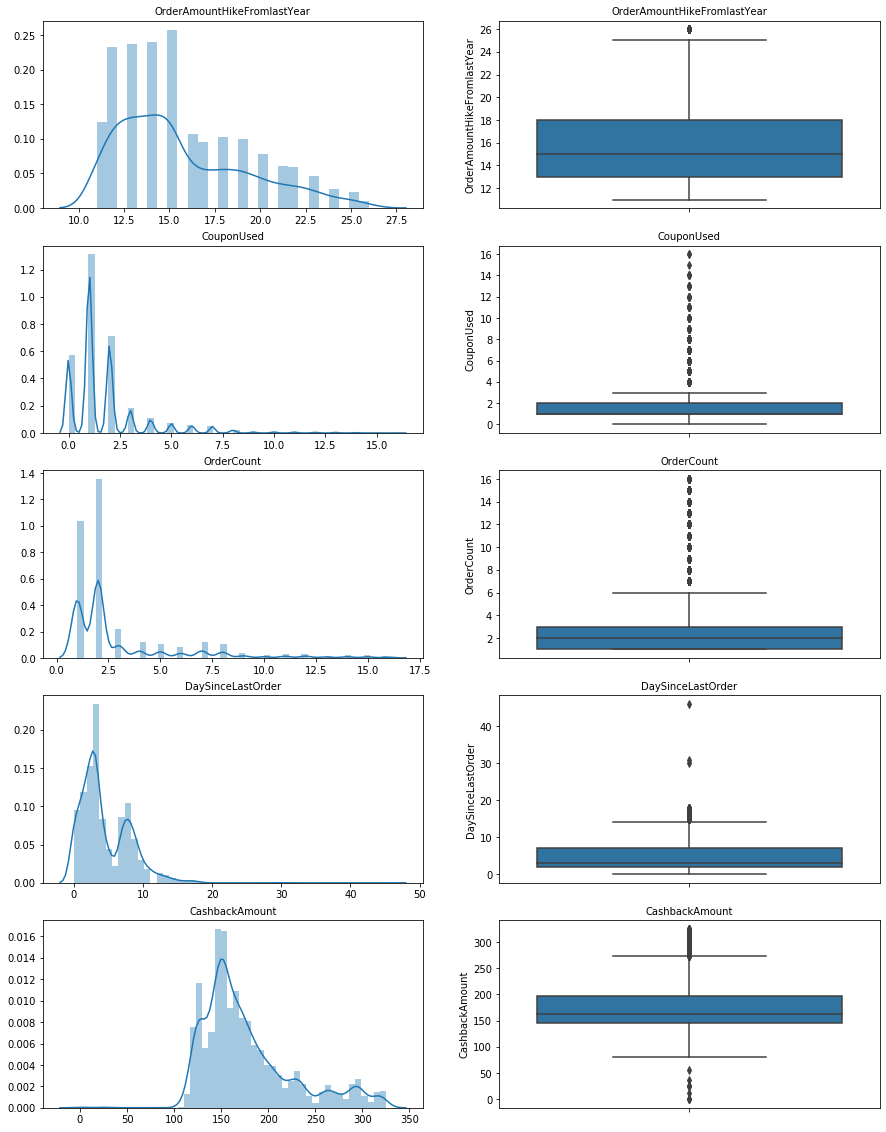

In [82]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(15,20)
a = sns.distplot(df_2['OrderAmountHikeFromlastYear'] , ax=axes[0][0],axlabel=False)
a.set_title("OrderAmountHikeFromlastYear",fontsize=10)
a = sns.boxplot(df_2['OrderAmountHikeFromlastYear'] , orient = "v" , ax=axes[0][1])
a.set_title("OrderAmountHikeFromlastYear",fontsize=10)
a = sns.distplot(df_2['CouponUsed'] , ax=axes[1][0],axlabel=False)
a.set_title("CouponUsed",fontsize=10)
a = sns.boxplot(df_2['CouponUsed'] , orient = "v" , ax=axes[1][1])
a.set_title("CouponUsed",fontsize=10)
a = sns.distplot(df_2['OrderCount'] , ax=axes[2][0],axlabel=False)
a.set_title("OrderCount",fontsize=10)
a = sns.boxplot(df_2['OrderCount'] , orient = "v" , ax=axes[2][1])
a.set_title("OrderCount",fontsize=10)
a = sns.distplot(df_2['DaySinceLastOrder'] , ax=axes[3][0],axlabel=False)
a.set_title("DaySinceLastOrder",fontsize=10)
a = sns.boxplot(df_2['DaySinceLastOrder'] , orient = "v" , ax=axes[3][1])
a.set_title("DaySinceLastOrder",fontsize=10)
a = sns.distplot(df_2['CashbackAmount'] , ax=axes[4][0],axlabel=False)
a.set_title("CashbackAmount",fontsize=10)
a = sns.boxplot(df_2['CashbackAmount'] , orient = "v" , ax=axes[4][1])
a.set_title("CashbackAmount",fontsize=10)

plt.show()

In [20]:
num_cat = ['HourSpendOnApp','SatisfactionScore','NumberOfDeviceRegistered','NumberOfAddress','CouponUsed','OrderCount','DaySinceLastOrder']
for i in num_cat:
    print("\n",i)
    print("-----------------------")
    print('Number of unique values: ',df_2[i].nunique())
    print('List of unique values  : ',df_2[i].unique())
    print(df_2[i].value_counts())
   


 HourSpendOnApp
-----------------------
Number of unique values:  3
List of unique values  :  ['Medium Usage' 'Low Usage' 'High Usage']
Medium Usage    2942
Low Usage       1509
High Usage      1179
Name: HourSpendOnApp, dtype: int64

 SatisfactionScore
-----------------------
Number of unique values:  5
List of unique values  :  [2. 3. 5. 4. 1.]
3.0    1698
1.0    1164
5.0    1108
4.0    1074
2.0     586
Name: SatisfactionScore, dtype: int64

 NumberOfDeviceRegistered
-----------------------
Number of unique values:  6
List of unique values  :  [3. 4. 5. 2. 1. 6.]
4.0    2377
3.0    1699
5.0     881
2.0     276
1.0     235
6.0     162
Name: NumberOfDeviceRegistered, dtype: int64

 NumberOfAddress
-----------------------
Number of unique values:  15
List of unique values  :  [ 9.  7.  6.  8.  3.  2.  4. 10.  1.  5. 19. 21. 11. 20. 22.]
2.0     1369
3.0     1278
4.0      588
5.0      571
6.0      382
1.0      371
8.0      280
7.0      256
9.0      239
10.0     194
11.0      98
21.0    

In [21]:
df_2['HourSpendOnApp'] = df_2['HourSpendOnApp'].apply(lambda x: 'Low Usage' 
                                                              if x<=2 else ('Medium Usage' if x>2 and x<4 else 'High Usage') )


TypeError: '<=' not supported between instances of 'str' and 'int'

In [23]:
df_2['SatisfactionScore'] = df_2['SatisfactionScore'].astype('object')

In [24]:
df_2['NumberOfDeviceRegistered'] = df_2['NumberOfDeviceRegistered'].apply(lambda x: 'One or Two' 
                                                                                  if x <=3 else 'Three or more')

In [25]:
df_2['NumberOfAddress'] = pd.cut(df_2['NumberOfAddress'],
                                     [0,2,4,6,8,25],
                                     labels = ['Less than 2',' 2 to 4','4 to 6','6 to 8','8 plus'],right = True)

In [26]:
df_2['CouponUsed'] = df_2['CouponUsed'].apply(lambda x: 'Less than 3' 
                                                      if x<3 else ('3 to 8' if x >=3 and x<8 else '8 plus')) 

In [27]:
df_2['OrderCount'] = pd.cut(df_2['OrderCount'],[0,3,6,10,18],
                               right = True,
                               labels = ['Less than 3',
                                        '3 to 6','6 to 10','10 plus'])

In [28]:
num_cat = ['HourSpendOnApp','SatisfactionScore','NumberOfDeviceRegistered','NumberOfAddress','CouponUsed','OrderCount']
for i in num_cat:
    print("\n",i)
    print("-----------------------")
    print('Number of unique values: ',df_2[i].nunique())
    print('List of unique values  : ',df_2[i].unique())
    print(df_2[i].value_counts())


 HourSpendOnApp
-----------------------
Number of unique values:  3
List of unique values  :  ['Medium Usage' 'Low Usage' 'High Usage']
Medium Usage    2942
Low Usage       1509
High Usage      1179
Name: HourSpendOnApp, dtype: int64

 SatisfactionScore
-----------------------
Number of unique values:  5
List of unique values  :  [2.0 3.0 5.0 4.0 1.0]
3.0    1698
1.0    1164
5.0    1108
4.0    1074
2.0     586
Name: SatisfactionScore, dtype: int64

 NumberOfDeviceRegistered
-----------------------
Number of unique values:  2
List of unique values  :  ['One or Two' 'Three or more']
Three or more    3420
One or Two       2210
Name: NumberOfDeviceRegistered, dtype: int64

 NumberOfAddress
-----------------------
Number of unique values:  5
List of unique values  :  [8 plus, 6 to 8, 4 to 6, 2 to 4, Less than 2]
Categories (5, object): [Less than 2 < 2 to 4 < 4 to 6 < 6 to 8 < 8 plus]
 2 to 4        1866
Less than 2    1740
4 to 6          953
6 to 8          536
8 plus          535
Name: 

In [26]:
numerical_var = list(df_2.dtypes[df_2.dtypes == 'float64'].index)
numerical_var

['Tenure',
 'WarehouseToHome',
 'OrderAmountHikeFromlastYear',
 'DaySinceLastOrder',
 'CashbackAmount']

In [27]:
categorical_var = list(df_2.dtypes[df_2.dtypes != 'float64'].index)
categorical_var

['HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'CouponUsed',
 'OrderCount',
 'Churn',
 'PreferredLoginDevice',
 'CityTier',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus',
 'Complain']

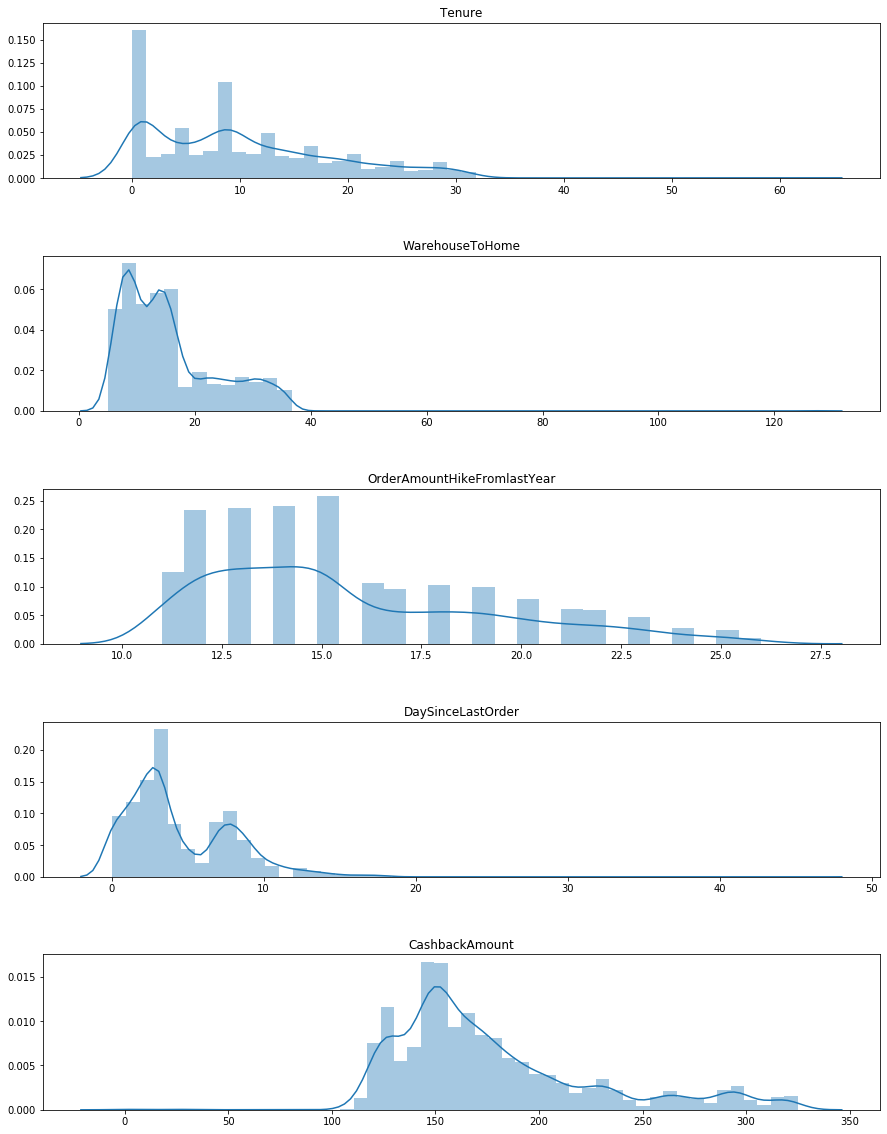

In [28]:
fig,axes = plt.subplots(5,1,figsize=(15,20))
plt.subplots_adjust(hspace = 0.5)
for i,j in zip(numerical_var,axes.flatten()):
    sns.distplot(df_2[i],ax = j,axlabel=False)
    j.set_title(i)

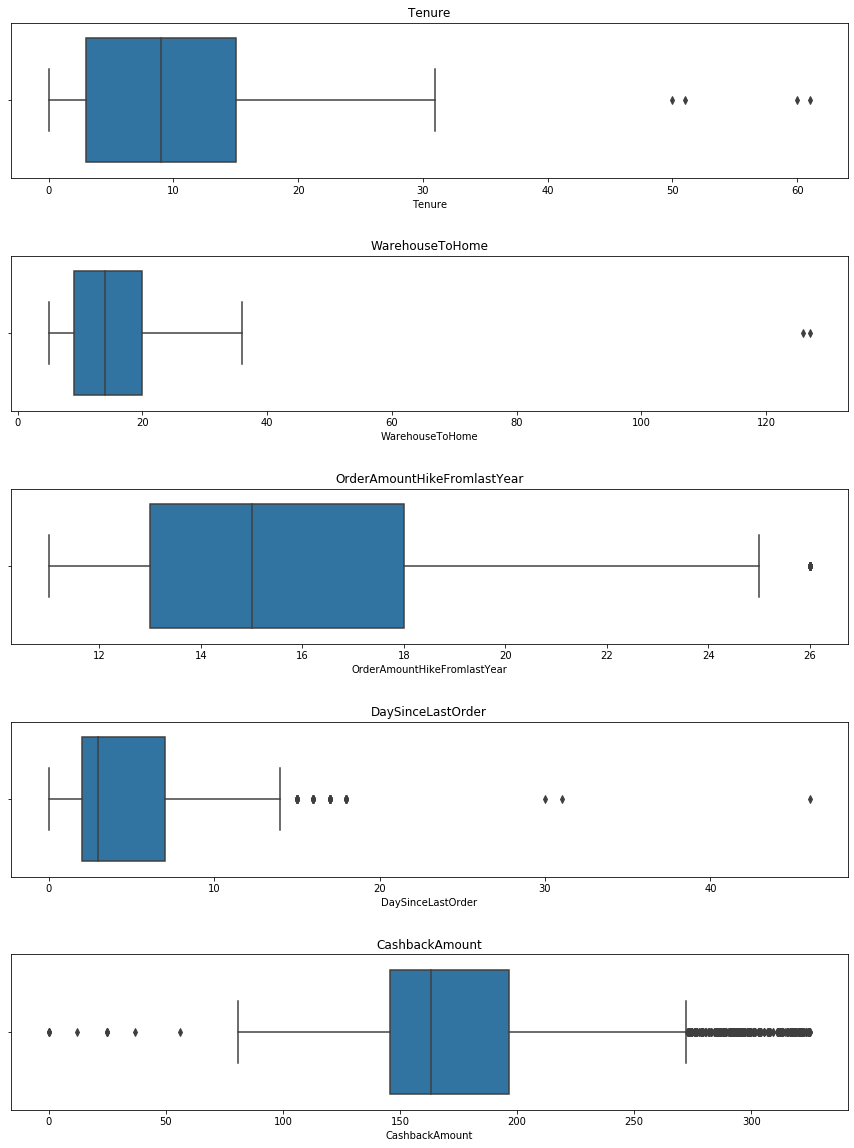

In [29]:
fig,axes = plt.subplots(5,1,figsize=(15,20))
plt.subplots_adjust(hspace = 0.5)
for i,j in zip(numerical_var,axes.flatten()):
    sns.boxplot(df_2[i],ax = j)
    j.set_title(i)

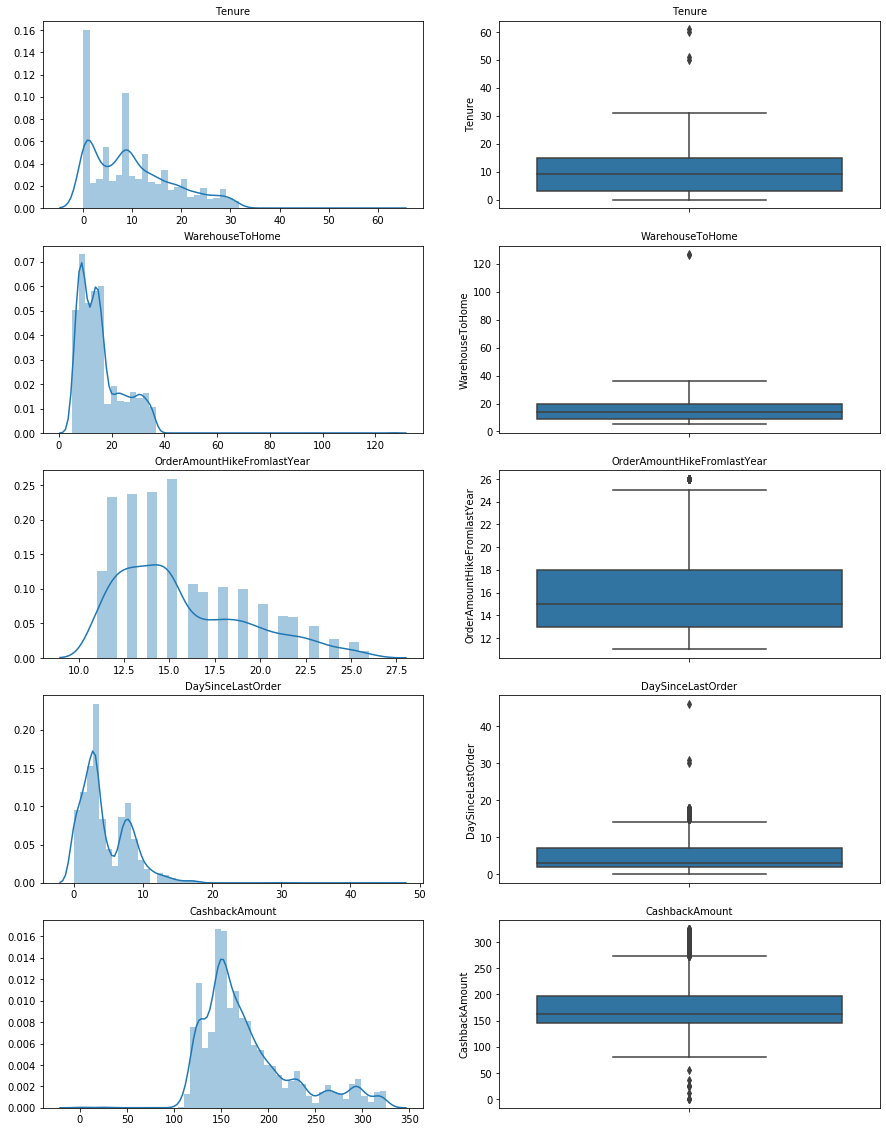

In [182]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(15,20)
a = sns.distplot(df_2['Tenure'] , ax=axes[0][0],axlabel=False)
a.set_title("Tenure",fontsize=10)
a = sns.boxplot(df_2['Tenure'] , orient = "v" , ax=axes[0][1])
a.set_title("Tenure",fontsize=10)
a = sns.distplot(df_2['WarehouseToHome'] , ax=axes[1][0],axlabel=False)
a.set_title("WarehouseToHome",fontsize=10)
a = sns.boxplot(df_2['WarehouseToHome'] , orient = "v" , ax=axes[1][1])
a.set_title("WarehouseToHome",fontsize=10)
a = sns.distplot(df_2['OrderAmountHikeFromlastYear'] , ax=axes[2][0],axlabel=False)
a.set_title("OrderAmountHikeFromlastYear",fontsize=10)
a = sns.boxplot(df_2['OrderAmountHikeFromlastYear'] , orient = "v" , ax=axes[2][1])
a.set_title("OrderAmountHikeFromlastYear",fontsize=10)
a = sns.distplot(df_2['DaySinceLastOrder'] , ax=axes[3][0],axlabel=False)
a.set_title("DaySinceLastOrder",fontsize=10)
a = sns.boxplot(df_2['DaySinceLastOrder'] , orient = "v" , ax=axes[3][1])
a.set_title("DaySinceLastOrder",fontsize=10)
a = sns.distplot(df_2['CashbackAmount'] , ax=axes[4][0],axlabel=False)
a.set_title("CashbackAmount",fontsize=10)
a = sns.boxplot(df_2['CashbackAmount'] , orient = "v" , ax=axes[4][1])
a.set_title("CashbackAmount",fontsize=10)

plt.show()

### Categorical Variables

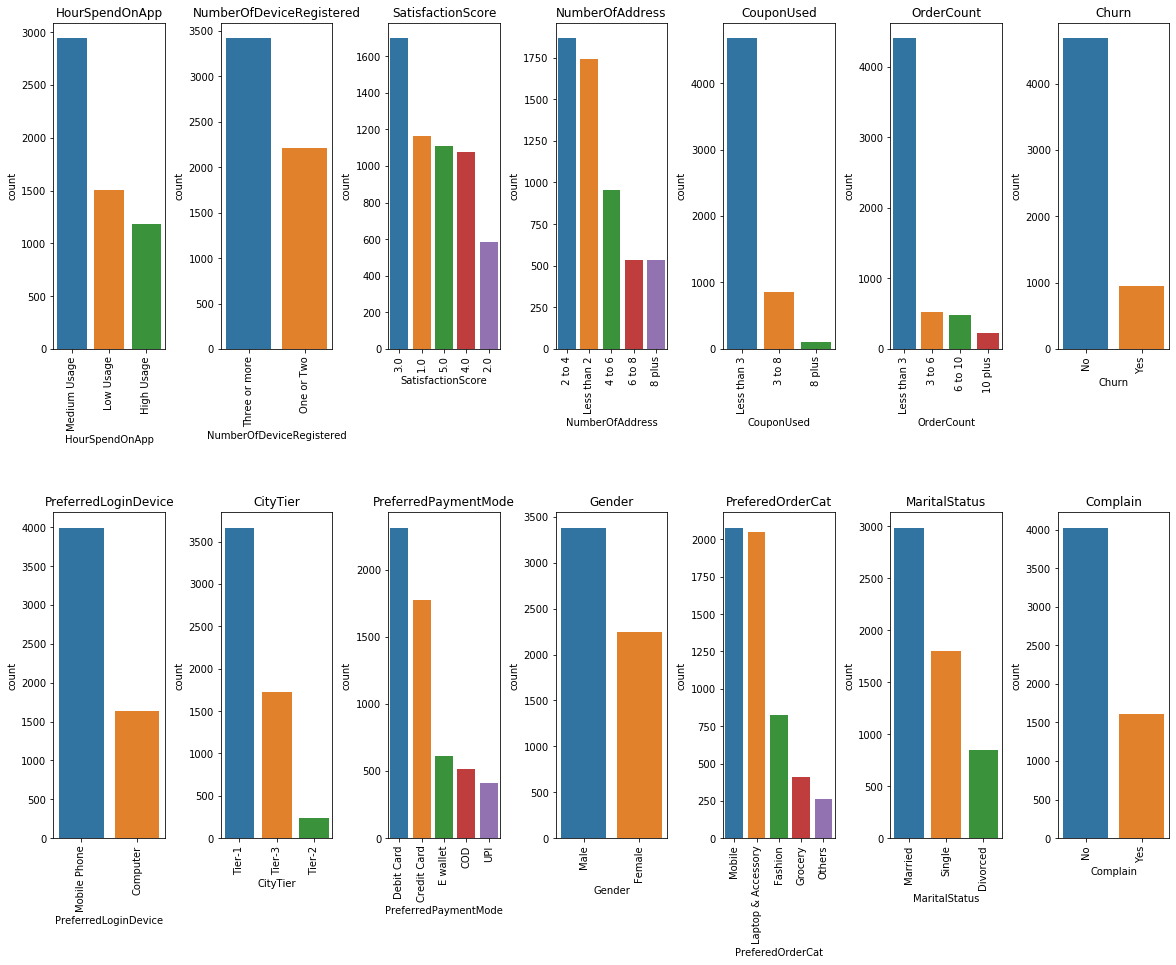

In [30]:
fig,axes = plt.subplots(2,7,figsize=(20,15))
plt.subplots_adjust(hspace = 0.5,wspace = 0.5)
for i,j in zip(categorical_var,axes.flatten()):
    sns.countplot(df_2[i],ax = j,order = df_2[i].value_counts().index)
    j.set_title(i)
    j.set_xticklabels(df_2[i].value_counts().index,rotation = 90)

## Bi-variate and Multi-variate analysis

In [29]:
# Looking at the proportions 
for i in categorical_var:
    print('Proportion of Customers as per {}'.format(i))
    print()
    print(df_2[i].value_counts()/df_2[i].value_counts().sum())
    print()

NameError: name 'categorical_var' is not defined

In [97]:
df_2[df_2['Churn']=='Yes']['HourSpendOnApp'].value_counts()

Medium Usage    518
Low Usage       232
High Usage      198
Name: HourSpendOnApp, dtype: int64

In [98]:
df_2[df_2['Churn']=='No']['HourSpendOnApp'].value_counts()

Medium Usage    2424
Low Usage       1277
High Usage       981
Name: HourSpendOnApp, dtype: int64

In [99]:
# Looking at the proportions 
print('Proportion of Customers who Churn as per Hours Spent on App')
print()
print(df_2[df_2['Churn']=='Yes']['HourSpendOnApp'].value_counts()/df_2[df_2['Churn']=='Yes']['HourSpendOnApp'].value_counts().sum())
print()

Proportion of Customers who Churn as per Hours Spent on App

Medium Usage    0.546414
Low Usage       0.244726
High Usage      0.208861
Name: HourSpendOnApp, dtype: float64



In [100]:
# Looking at the proportions 
print('Proportion of Customers who havenot churned as per Hours Spent on App')
print()
print(df_2[df_2['Churn']=='No']['HourSpendOnApp'].value_counts()/df_2[df_2['Churn']=='No']['HourSpendOnApp'].value_counts().sum())
print()

Proportion of Customers who havenot churned as per Hours Spent on App

Medium Usage    0.517727
Low Usage       0.272747
High Usage      0.209526
Name: HourSpendOnApp, dtype: float64



In [101]:
# Looking at the proportions 
print('Proportion of Customers who  churned as per NumberOfDeviceRegistered')
print()
print(df_2[df_2['Churn']=='Yes']['NumberOfDeviceRegistered'].value_counts()/df_2[df_2['Churn']=='Yes']['NumberOfDeviceRegistered'].value_counts().sum())
print()
# Looking at the proportions 
print('Proportion of Customers who havenot churned as per NumberOfDeviceRegistered')
print()
print(df_2[df_2['Churn']=='No']['NumberOfDeviceRegistered'].value_counts()/df_2[df_2['Churn']=='No']['NumberOfDeviceRegistered'].value_counts().sum())
print()

Proportion of Customers who  churned as per NumberOfDeviceRegistered

Three or more    0.681435
One or Two       0.318565
Name: NumberOfDeviceRegistered, dtype: float64

Proportion of Customers who havenot churned as per NumberOfDeviceRegistered

Three or more    0.592482
One or Two       0.407518
Name: NumberOfDeviceRegistered, dtype: float64



In [102]:
# Looking at the proportions 
print('Proportion of Customers who  churned as per SatisfactionScore')
print()
print(df_2[df_2['Churn']=='Yes']['SatisfactionScore'].value_counts()/df_2[df_2['Churn']=='Yes']['SatisfactionScore'].value_counts().sum())
print()
# Looking at the proportions 
print('Proportion of Customers who havenot churned as per SatisfactionScore')
print()
print(df_2[df_2['Churn']=='No']['SatisfactionScore'].value_counts()/df_2[df_2['Churn']=='No']['SatisfactionScore'].value_counts().sum())
print()

Proportion of Customers who  churned as per SatisfactionScore

3.0    0.308017
5.0    0.278481
4.0    0.194093
1.0    0.141350
2.0    0.078059
Name: SatisfactionScore, dtype: float64

Proportion of Customers who havenot churned as per SatisfactionScore

3.0    0.300299
1.0    0.219991
4.0    0.190090
5.0    0.180265
2.0    0.109355
Name: SatisfactionScore, dtype: float64



In [103]:
# Looking at the proportions 
print('Proportion of Customers who  churned as per NumberOfAddress')
print()
print(df_2[df_2['Churn']=='Yes']['NumberOfAddress'].value_counts()/df_2[df_2['Churn']=='Yes']['NumberOfAddress'].value_counts().sum())
print()
# Looking at the proportions 
print('Proportion of Customers who havenot churned as per NumberOfAddress')
print()
print(df_2[df_2['Churn']=='No']['NumberOfAddress'].value_counts()/df_2[df_2['Churn']=='No']['NumberOfAddress'].value_counts().sum())
print()

Proportion of Customers who  churned as per NumberOfAddress

 2 to 4        0.309072
Less than 2    0.301688
4 to 6         0.140295
6 to 8         0.137131
8 plus         0.111814
Name: NumberOfAddress, dtype: float64

Proportion of Customers who havenot churned as per NumberOfAddress

 2 to 4        0.335968
Less than 2    0.310551
4 to 6         0.175139
8 plus         0.091628
6 to 8         0.086715
Name: NumberOfAddress, dtype: float64



In [104]:
# Looking at the proportions 
print('Proportion of Customers who  churned as per CouponUsed')
print()
print(df_2[df_2['Churn']=='Yes']['CouponUsed'].value_counts()/df_2[df_2['Churn']=='Yes']['CouponUsed'].value_counts().sum())
print()
# Looking at the proportions 
print('Proportion of Customers who havenot churned as per CouponUsed')
print()
print(df_2[df_2['Churn']=='No']['CouponUsed'].value_counts()/df_2[df_2['Churn']=='No']['CouponUsed'].value_counts().sum())
print()

Proportion of Customers who  churned as per CouponUsed

Less than 3    0.837553
3 to 8         0.142405
8 plus         0.020042
Name: CouponUsed, dtype: float64

Proportion of Customers who havenot churned as per CouponUsed

Less than 3    0.828706
3 to 8         0.152713
8 plus         0.018582
Name: CouponUsed, dtype: float64



In [105]:
# Looking at the proportions 
print('Proportion of Customers who  churned as per OrderCount')
print()
print(df_2[df_2['Churn']=='Yes']['OrderCount'].value_counts()/df_2[df_2['Churn']=='Yes']['OrderCount'].value_counts().sum())
print()
# Looking at the proportions 
print('Proportion of Customers who havenot churned as per OrderCount')
print()
print(df_2[df_2['Churn']=='No']['OrderCount'].value_counts()/df_2[df_2['Churn']=='No']['OrderCount'].value_counts().sum())
print()

Proportion of Customers who  churned as per OrderCount

Less than 3    0.814346
6 to 10        0.094937
3 to 6         0.061181
10 plus        0.029536
Name: OrderCount, dtype: float64

Proportion of Customers who havenot churned as per OrderCount

Less than 3    0.775950
3 to 6         0.099103
6 to 10        0.082443
10 plus        0.042503
Name: OrderCount, dtype: float64



In [106]:
# Looking at the proportions 
print('Proportion of Customers who  churned as per PreferredLoginDevice')
print()
print(df_2[df_2['Churn']=='Yes']['PreferredLoginDevice'].value_counts()/df_2[df_2['Churn']=='Yes']['PreferredLoginDevice'].value_counts().sum())
print()
# Looking at the proportions 
print('Proportion of Customers who havenot churned as per PreferredLoginDevice')
print()
print(df_2[df_2['Churn']=='No']['PreferredLoginDevice'].value_counts()/df_2[df_2['Churn']=='No']['PreferredLoginDevice'].value_counts().sum())
print()

Proportion of Customers who  churned as per PreferredLoginDevice

Mobile Phone    0.658228
Computer        0.341772
Name: PreferredLoginDevice, dtype: float64

Proportion of Customers who havenot churned as per PreferredLoginDevice

Mobile Phone    0.720205
Computer        0.279795
Name: PreferredLoginDevice, dtype: float64



In [107]:
# Looking at the proportions 
print('Proportion of Customers who  churned as per CityTier')
print()
print(df_2[df_2['Churn']=='Yes']['CityTier'].value_counts()/df_2[df_2['Churn']=='Yes']['CityTier'].value_counts().sum())
print()
# Looking at the proportions 
print('Proportion of Customers who havenot churned as per CityTier')
print()
print(df_2[df_2['Churn']=='No']['CityTier'].value_counts()/df_2[df_2['Churn']=='No']['CityTier'].value_counts().sum())
print()

Proportion of Customers who  churned as per CityTier

Tier-1    0.561181
Tier-3    0.388186
Tier-2    0.050633
Name: CityTier, dtype: float64

Proportion of Customers who havenot churned as per CityTier

Tier-1    0.669372
Tier-3    0.289193
Tier-2    0.041435
Name: CityTier, dtype: float64



In [108]:
# Looking at the proportions 
print('Proportion of Customers who  churned as per PreferredPaymentMode')
print()
print(df_2[df_2['Churn']=='Yes']['PreferredPaymentMode'].value_counts()/df_2[df_2['Churn']=='Yes']['PreferredPaymentMode'].value_counts().sum())
print()
# Looking at the proportions 
print('Proportion of Customers who havenot churned as per PreferredPaymentMode')
print()
print(df_2[df_2['Churn']=='No']['PreferredPaymentMode'].value_counts()/df_2[df_2['Churn']=='No']['PreferredPaymentMode'].value_counts().sum())
print()

Proportion of Customers who  churned as per PreferredPaymentMode

Debit Card     0.375527
Credit Card    0.265823
E wallet       0.147679
COD            0.135021
UPI            0.075949
Name: PreferredPaymentMode, dtype: float64

Proportion of Customers who havenot churned as per PreferredPaymentMode

Debit Card     0.418197
Credit Card    0.325075
E wallet       0.101239
COD            0.082443
UPI            0.073046
Name: PreferredPaymentMode, dtype: float64



In [109]:
# Looking at the proportions 
print('Proportion of Customers who  churned as per Gender')
print()
print(df_2[df_2['Churn']=='Yes']['Gender'].value_counts()/df_2[df_2['Churn']=='Yes']['Gender'].value_counts().sum())
print()
# Looking at the proportions 
print('Proportion of Customers who havenot churned as per Gender')
print()
print(df_2[df_2['Churn']=='No']['Gender'].value_counts()/df_2[df_2['Churn']=='No']['Gender'].value_counts().sum())
print()

Proportion of Customers who  churned as per Gender

Male      0.632911
Female    0.367089
Name: Gender, dtype: float64

Proportion of Customers who havenot churned as per Gender

Male      0.594618
Female    0.405382
Name: Gender, dtype: float64



In [110]:
# Looking at the proportions 
print('Proportion of Customers who  churned as per PreferedOrderCat')
print()
print(df_2[df_2['Churn']=='Yes']['PreferedOrderCat'].value_counts()/df_2[df_2['Churn']=='Yes']['PreferedOrderCat'].value_counts().sum())
print()
# Looking at the proportions !
print('Proportion of Customers who havenot churned as per PreferedOrderCat')
print()
print(df_2[df_2['Churn']=='No']['PreferedOrderCat'].value_counts()/df_2[df_2['Churn']=='No']['PreferedOrderCat'].value_counts().sum())
print()

Proportion of Customers who  churned as per PreferedOrderCat

Mobile                0.601266
Laptop & Accessory    0.221519
Fashion               0.135021
Others                0.021097
Grocery               0.021097
Name: PreferedOrderCat, dtype: float64

Proportion of Customers who havenot churned as per PreferedOrderCat

Laptop & Accessory    0.392994
Mobile                0.322512
Fashion               0.149082
Grocery               0.083298
Others                0.052114
Name: PreferedOrderCat, dtype: float64



In [111]:
# Looking at the proportions 
print('Proportion of Customers who  churned as per MaritalStatus')
print()
print(df_2[df_2['Churn']=='Yes']['MaritalStatus'].value_counts()/df_2[df_2['Churn']=='Yes']['MaritalStatus'].value_counts().sum())
print()
# Looking at the proportions 
print('Proportion of Customers who havenot churned as per MaritalStatus')
print()
print(df_2[df_2['Churn']=='No']['MaritalStatus'].value_counts()/df_2[df_2['Churn']=='No']['MaritalStatus'].value_counts().sum())
print()

Proportion of Customers who  churned as per MaritalStatus

Single      0.506329
Married     0.362869
Divorced    0.130802
Name: MaritalStatus, dtype: float64

Proportion of Customers who havenot churned as per MaritalStatus

Married     0.564289
Single      0.281076
Divorced    0.154635
Name: MaritalStatus, dtype: float64



In [112]:
# Looking at the proportions 
print('Proportion of Customers who  churned as per Complain raised')
print()
print(df_2[df_2['Churn']=='Yes']['Complain'].value_counts()/df_2[df_2['Churn']=='Yes']['Complain'].value_counts().sum())
print()
# Looking at the proportions 
print('Proportion of Customers who havenot churned as per Complain raised')
print()
print(df_2[df_2['Churn']=='No']['Complain'].value_counts()/df_2[df_2['Churn']=='No']['Complain'].value_counts().sum())
print()

Proportion of Customers who  churned as per Complain raised

Yes    0.535865
No     0.464135
Name: Complain, dtype: float64

Proportion of Customers who havenot churned as per Complain raised

No     0.765912
Yes    0.234088
Name: Complain, dtype: float64



In [30]:
df_2['Churn'].value_counts(normalize=True)

No     0.831616
Yes    0.168384
Name: Churn, dtype: float64

In [31]:
pd.crosstab(df_2['Churn'],df_2['Gender'],normalize = "index")

Gender,Female,Male
Churn,,
No,0.405382,0.594618
Yes,0.367089,0.632911


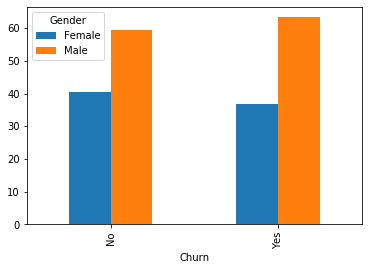

In [115]:
c1 = pd.crosstab(df_2['Churn'],df_2['Gender'],normalize = "index")
c1*=100
c1.plot.bar()
plt.show()

In [32]:
pd.crosstab(df_2['Churn'],df_2['Gender'],normalize = "columns")

Gender,Female,Male
Churn,,
No,0.845058,0.822695
Yes,0.154942,0.177305


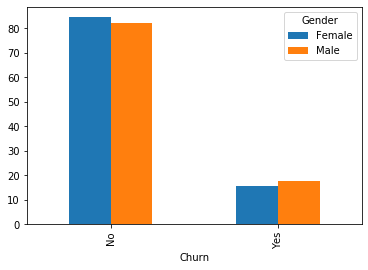

In [36]:
d1 = pd.crosstab(df_2['Churn'],df_2['Gender'],normalize = "columns")
d1*=100
d1.plot.bar()
plt.show()

In [33]:
pd.crosstab(df_2['Churn'],df_2['CityTier'],normalize = "index")

CityTier,Tier-1,Tier-2,Tier-3
Churn,,,
No,0.669372,0.041435,0.289193
Yes,0.561181,0.050633,0.388186


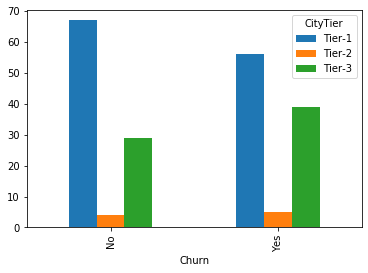

In [117]:
c1 = pd.crosstab(df_2['Churn'],df_2['CityTier'],normalize = "index")
c1*=100
c1.plot.bar()
plt.show()

In [37]:
pd.crosstab(df_2['Churn'],df_2['CityTier'],normalize = "columns")

CityTier,Tier-1,Tier-2,Tier-3
Churn,,,
No,0.854883,0.801653,0.786295
Yes,0.145117,0.198347,0.213705


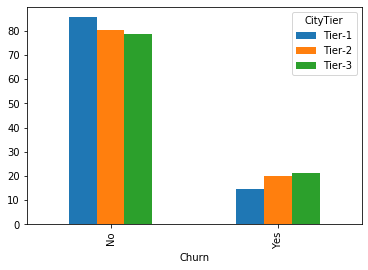

In [38]:
d1 = pd.crosstab(df_2['Churn'],df_2['CityTier'],normalize = "columns")
d1*=100
d1.plot.bar()
plt.show()

In [118]:
pd.crosstab(df_2['Churn'],df_2['HourSpendOnApp'],normalize = "index")

HourSpendOnApp,High Usage,Low Usage,Medium Usage
Churn,,,
No,0.209526,0.272747,0.517727
Yes,0.208861,0.244726,0.546414


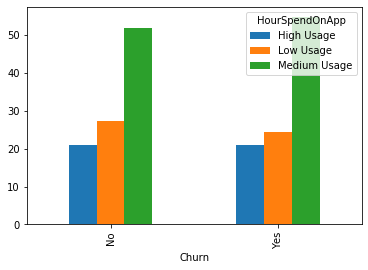

In [119]:
c2 = pd.crosstab(df_2['Churn'],df_2['HourSpendOnApp'],normalize = "index")
c2*=100
c2.plot.bar()
plt.show()

In [39]:
pd.crosstab(df_2['Churn'],df_2['HourSpendOnApp'],normalize = "columns")

HourSpendOnApp,High Usage,Low Usage,Medium Usage
Churn,,,
No,0.832061,0.846256,0.823929
Yes,0.167939,0.153744,0.176071


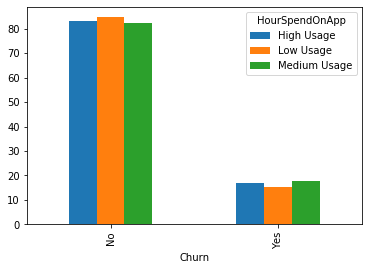

In [40]:
d2 = pd.crosstab(df_2['Churn'],df_2['HourSpendOnApp'],normalize = "columns")
d2*=100
d2.plot.bar()
plt.show()

In [120]:
pd.crosstab(df_2['Churn'],df_2['NumberOfDeviceRegistered'],normalize = "index")

NumberOfDeviceRegistered,One or Two,Three or more
Churn,,
No,0.407518,0.592482
Yes,0.318565,0.681435


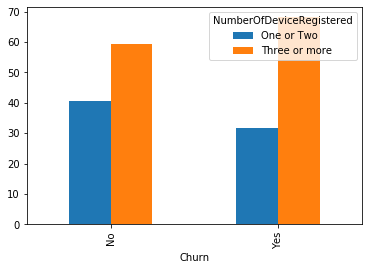

In [121]:
c3 = pd.crosstab(df_2['Churn'],df_2['NumberOfDeviceRegistered'],normalize = "index")
c3*=100
c3.plot.bar()
plt.show()

In [41]:
pd.crosstab(df_2['Churn'],df_2['NumberOfDeviceRegistered'],normalize = "columns")

NumberOfDeviceRegistered,One or Two,Three or more
Churn,,
No,0.863348,0.811111
Yes,0.136652,0.188889


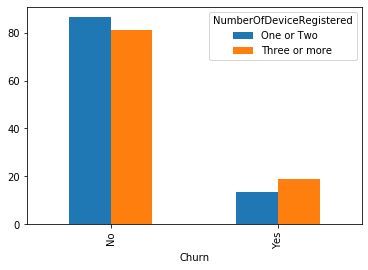

In [42]:
d3 = pd.crosstab(df_2['Churn'],df_2['NumberOfDeviceRegistered'],normalize = "columns")
d3*=100
d3.plot.bar()
plt.show()

In [122]:
pd.crosstab(df_2['Churn'],df_2['SatisfactionScore'],normalize = "index")

SatisfactionScore,1.0,2.0,3.0,4.0,5.0
Churn,,,,,
No,0.219991,0.109355,0.300299,0.190090,0.180265
Yes,0.141350,0.078059,0.308017,0.194093,0.278481


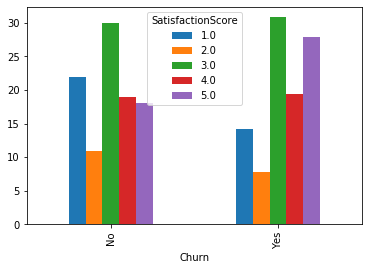

In [123]:
c4 = pd.crosstab(df_2['Churn'],df_2['SatisfactionScore'],normalize = "index")
c4*=100
c4.plot.bar()
plt.show()

In [43]:
pd.crosstab(df_2['Churn'],df_2['SatisfactionScore'],normalize = "columns")

SatisfactionScore,1.0,2.0,3.0,4.0,5.0
Churn,,,,,
No,0.88488,0.87372,0.828033,0.828678,0.761733
Yes,0.11512,0.12628,0.171967,0.171322,0.238267


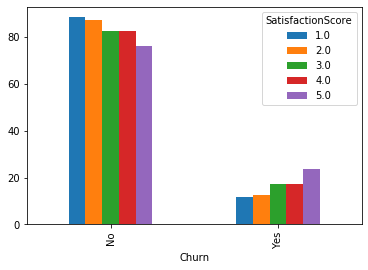

In [44]:
d4 = pd.crosstab(df_2['Churn'],df_2['SatisfactionScore'],normalize = "columns")
d4*=100
d4.plot.bar()
plt.show()

In [34]:
pd.crosstab(df_2['Churn'],df_2['NumberOfAddress'],normalize = "index")

NumberOfAddress,Less than 2,2 to 4,4 to 6,6 to 8,8 plus
Churn,,,,,
No,0.310551,0.335968,0.175139,0.086715,0.091628
Yes,0.301688,0.309072,0.140295,0.137131,0.111814


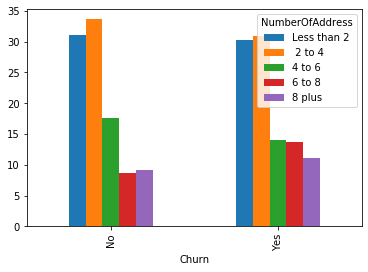

In [125]:
c5 = pd.crosstab(df_2['Churn'],df_2['NumberOfAddress'],normalize = "index")
c5*=100
c5.plot.bar()
plt.show()

In [35]:
pd.crosstab(df_2['Churn'],df_2['NumberOfAddress'],normalize = "columns")

NumberOfAddress,Less than 2,2 to 4,4 to 6,6 to 8,8 plus
Churn,,,,,
No,0.835632,0.84298,0.860441,0.757463,0.801869
Yes,0.164368,0.15702,0.139559,0.242537,0.198131


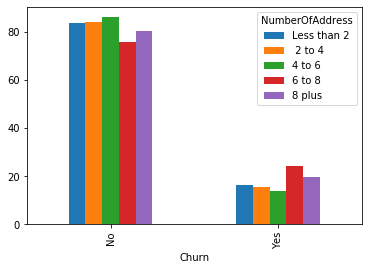

In [36]:
c5 = pd.crosstab(df_2['Churn'],df_2['NumberOfAddress'],normalize = "columns")
c5*=100
c5.plot.bar()
plt.show()

In [126]:
pd.crosstab(df_2['Churn'],df_2['CouponUsed'],normalize = "index")

CouponUsed,3 to 8,8 plus,Less than 3
Churn,,,
No,0.152713,0.018582,0.828706
Yes,0.142405,0.020042,0.837553


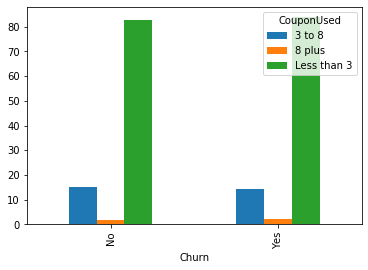

In [127]:
c6 = pd.crosstab(df_2['Churn'],df_2['CouponUsed'],normalize = "index")
c6*=100
c6.plot.bar()
plt.show()

In [37]:
pd.crosstab(df_2['Churn'],df_2['CouponUsed'],normalize = "columns")

CouponUsed,3 to 8,8 plus,Less than 3
Churn,,,
No,0.841176,0.820755,0.830124
Yes,0.158824,0.179245,0.169876


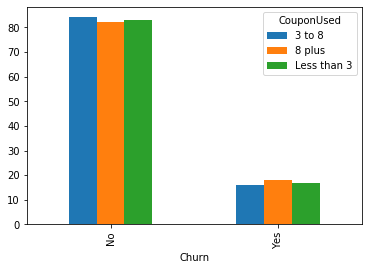

In [38]:
c6 = pd.crosstab(df_2['Churn'],df_2['CouponUsed'],normalize = "columns")
c6*=100
c6.plot.bar()
plt.show()

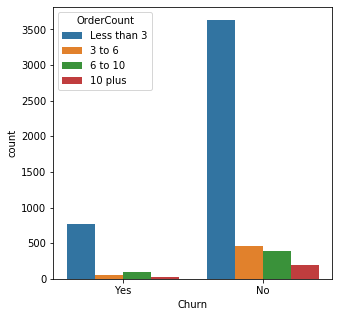

In [128]:
fig,axes = plt.subplots(figsize = (5,5))
sns.countplot(df_2['Churn'],hue = df_2['OrderCount'])

In [129]:
pd.crosstab(df_2['Churn'],df_2['OrderCount'],normalize = "index")

OrderCount,Less than 3,3 to 6,6 to 10,10 plus
Churn,,,,
No,0.775950,0.099103,0.082443,0.042503
Yes,0.814346,0.061181,0.094937,0.029536


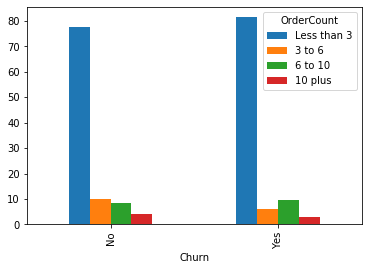

In [130]:
c = pd.crosstab(df_2['Churn'],df_2['OrderCount'],normalize = "index")
c *=100
c.plot.bar()
plt.show()

In [39]:
pd.crosstab(df_2['Churn'],df_2['OrderCount'],normalize = "columns")

OrderCount,Less than 3,3 to 6,6 to 10,10 plus
Churn,,,,
No,0.824745,0.888889,0.810924,0.876652
Yes,0.175255,0.111111,0.189076,0.123348


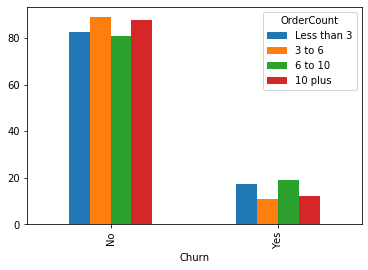

In [40]:
c = pd.crosstab(df_2['Churn'],df_2['OrderCount'],normalize = "columns")
c *=100
c.plot.bar()
plt.show()

In [131]:
pd.crosstab(df_2['Churn'],df_2['PreferredLoginDevice'],normalize = "index")

PreferredLoginDevice,Computer,Mobile Phone
Churn,,
No,0.279795,0.720205
Yes,0.341772,0.658228


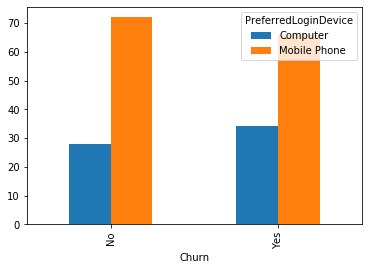

In [132]:
c7 = pd.crosstab(df_2['Churn'],df_2['PreferredLoginDevice'],normalize = "index")
c7 *=100
c7.plot.bar()
plt.show()

In [43]:
pd.crosstab(df_2['Churn'],df_2['PreferredLoginDevice'],normalize = "columns")

PreferredLoginDevice,Computer,Mobile Phone
Churn,,
No,0.801714,0.843844
Yes,0.198286,0.156156


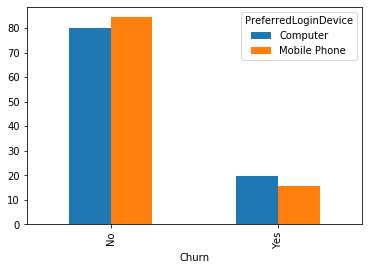

In [44]:
c7 = pd.crosstab(df_2['Churn'],df_2['PreferredLoginDevice'],normalize = "columns")
c7 *=100
c7.plot.bar()
plt.show()

In [133]:
pd.crosstab(df_2['Churn'],df_2['PreferredPaymentMode'],normalize = "index")

PreferredPaymentMode,COD,Credit Card,Debit Card,E wallet,UPI
Churn,,,,,
No,0.082443,0.325075,0.418197,0.101239,0.073046
Yes,0.135021,0.265823,0.375527,0.147679,0.075949


In [41]:
pd.crosstab(df_2['Churn'],df_2['PreferredPaymentMode'],normalize = "columns")

PreferredPaymentMode,COD,Credit Card,Debit Card,E wallet,UPI
Churn,,,,,
No,0.750973,0.857948,0.846154,0.771987,0.826087
Yes,0.249027,0.142052,0.153846,0.228013,0.173913


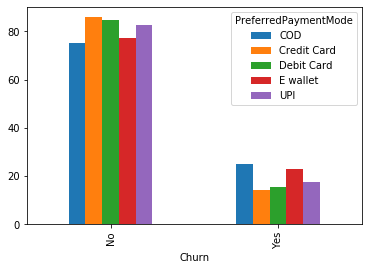

In [42]:
c11 = pd.crosstab(df_2['Churn'],df_2['PreferredPaymentMode'],normalize = "columns")
c11 *=100
c11.plot.bar()
plt.show()

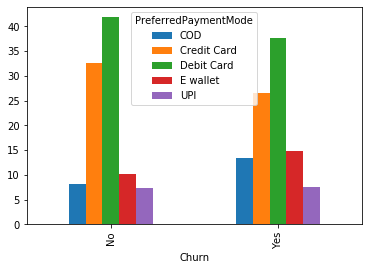

In [134]:
c11 = pd.crosstab(df_2['Churn'],df_2['PreferredPaymentMode'],normalize = "index")
c11 *=100
c11.plot.bar()
plt.show()

In [135]:
pd.crosstab(df_2['Churn'],df_2['PreferedOrderCat'],normalize = "index")

PreferedOrderCat,Fashion,Grocery,Laptop & Accessory,Mobile,Others
Churn,,,,,
No,0.149082,0.083298,0.392994,0.322512,0.052114
Yes,0.135021,0.021097,0.221519,0.601266,0.021097


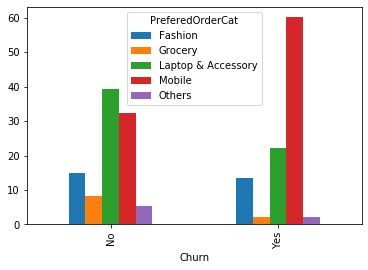

In [136]:
c12 = pd.crosstab(df_2['Churn'],df_2['PreferedOrderCat'],normalize = "index")
c12 *=100
c12.plot.bar()
plt.show()

In [45]:
pd.crosstab(df_2['Churn'],df_2['PreferedOrderCat'],normalize = "columns")

PreferedOrderCat,Fashion,Grocery,Laptop & Accessory,Mobile,Others
Churn,,,,,
No,0.845036,0.95122,0.897561,0.725962,0.924242
Yes,0.154964,0.04878,0.102439,0.274038,0.075758


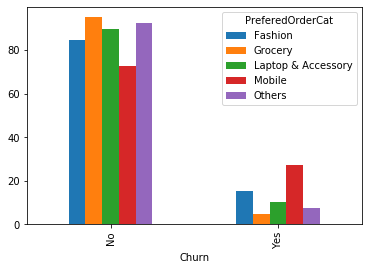

In [46]:
c12 = pd.crosstab(df_2['Churn'],df_2['PreferedOrderCat'],normalize = "columns")
c12 *=100
c12.plot.bar()
plt.show()

In [137]:
pd.crosstab(df_2['Churn'],df_2['MaritalStatus'],normalize = "index")

MaritalStatus,Divorced,Married,Single
Churn,,,
No,0.154635,0.564289,0.281076
Yes,0.130802,0.362869,0.506329


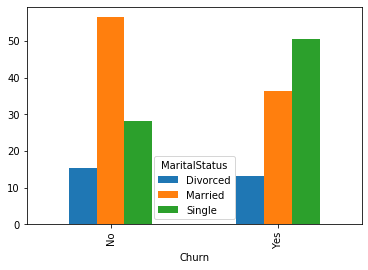

In [138]:
c13 = pd.crosstab(df_2['Churn'],df_2['MaritalStatus'],normalize = "index")
c13 *=100
c13.plot.bar()
plt.show()

In [47]:
pd.crosstab(df_2['Churn'],df_2['MaritalStatus'],normalize = "columns")

MaritalStatus,Divorced,Married,Single
Churn,,,
No,0.853774,0.884796,0.732739
Yes,0.146226,0.115204,0.267261


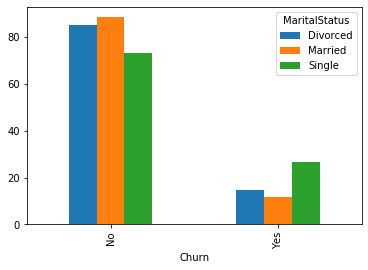

In [48]:
c13 = pd.crosstab(df_2['Churn'],df_2['MaritalStatus'],normalize = "columns")
c13 *=100
c13.plot.bar()
plt.show()

In [139]:
pd.crosstab(df_2['Churn'],df_2['Complain'],normalize = "index")

Complain,No,Yes
Churn,,
No,0.765912,0.234088
Yes,0.464135,0.535865


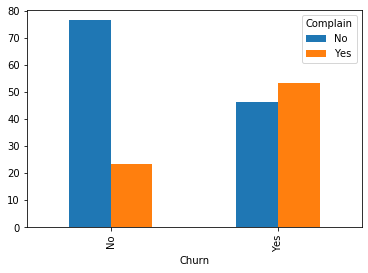

In [140]:
c14 = pd.crosstab(df_2['Churn'],df_2['Complain'],normalize = "index")
c14 *=100
c14.plot.bar()
plt.show()

In [49]:
pd.crosstab(df_2['Churn'],df_2['Complain'],normalize = "columns")

Complain,No,Yes
Churn,,
No,0.89071,0.683292
Yes,0.10929,0.316708


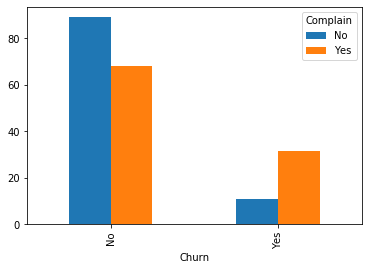

In [50]:
c14 = pd.crosstab(df_2['Churn'],df_2['Complain'],normalize = "columns")
c14 *=100
c14.plot.bar()
plt.show()

In [141]:
categorical_var

['HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'CouponUsed',
 'OrderCount',
 'Churn',
 'PreferredLoginDevice',
 'CityTier',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus',
 'Complain']

In [185]:
churn_Yes = df_2[['HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress',
    'PreferredLoginDevice','CouponUsed','OrderCount','CityTier','PreferredPaymentMode',
    'Gender','PreferedOrderCat','MaritalStatus','Complain']].where(df_2['Churn']=='Yes').mode().T

In [143]:
churn_Yes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, HourSpendOnApp to Complain
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       13 non-null     object
dtypes: object(1)
memory usage: 208.0+ bytes


In [186]:
churn_Yes.rename(columns = {0:'Churners_Mode'},inplace = True)

In [187]:
churn_No = df_2[['HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress',
    'PreferredLoginDevice','CouponUsed','OrderCount','CityTier','PreferredPaymentMode',
    'Gender','PreferedOrderCat','MaritalStatus','Complain']].where(df_2['Churn']=='No').mode().T

In [188]:
churn_No.rename(columns = {0:'Non_Churners_Mode'},inplace = True)

In [189]:
t = pd.concat([churn_Yes,churn_No],axis = 1)
t

,Churners_Mode,Non_Churners_Mode
HourSpendOnApp,Medium Usage,Medium Usage
NumberOfDeviceRegistered,Three or more,Three or more
SatisfactionScore,3,3
NumberOfAddress,2 to 4,2 to 4
PreferredLoginDevice,Mobile Phone,Mobile Phone
CouponUsed,Less than 3,Less than 3
OrderCount,Less than 3,Less than 3
CityTier,Tier-1,Tier-1
PreferredPaymentMode,Debit Card,Debit Card
Gender,Male,Male


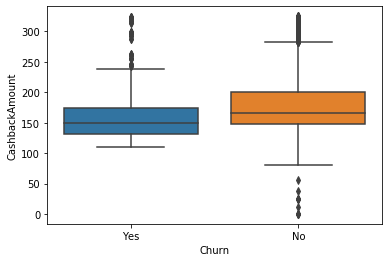

In [148]:
sns.boxplot(y = 'CashbackAmount',x = 'Churn',data = df_2)

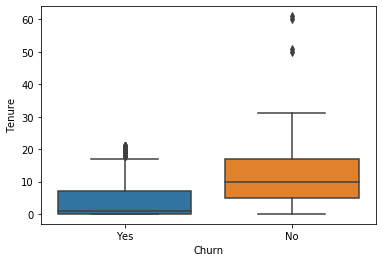

In [149]:
sns.boxplot(y = 'Tenure',x = 'Churn',data = df_2)

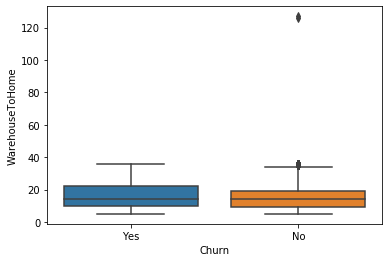

In [150]:
sns.boxplot(y = 'WarehouseToHome',x = 'Churn',data = df_2)

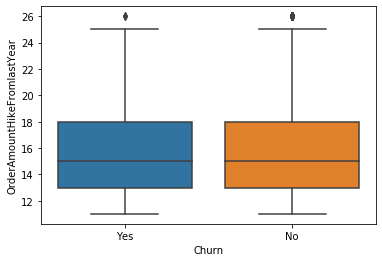

In [151]:
sns.boxplot(y = 'OrderAmountHikeFromlastYear',x = 'Churn',data = df_2)

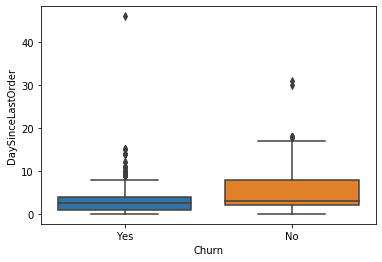

In [152]:
sns.boxplot(y = 'DaySinceLastOrder',x = 'Churn',data = df_2)

## Bi-variate and Multi-variate analysis

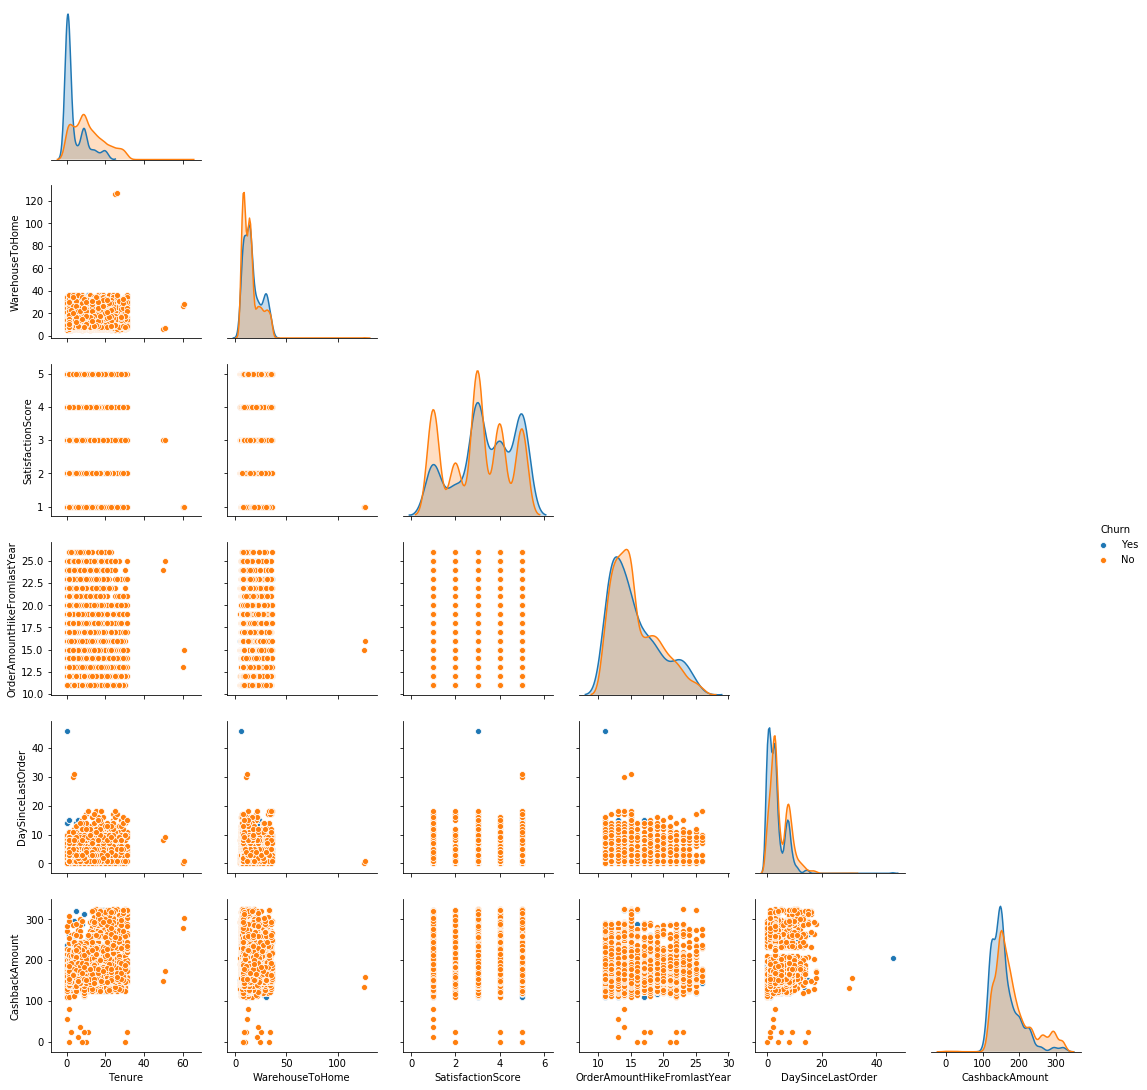

In [153]:
sns.pairplot(df_2,corner = True,hue = 'Churn')

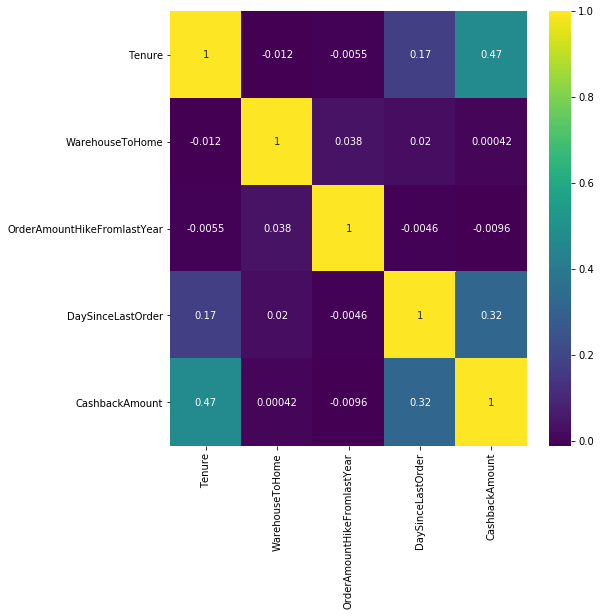

In [154]:
fig,axes = plt.subplots(figsize=(8,8))
sns.heatmap(df_2.corr(),annot = True,cmap = 'viridis')

We can see from the above high-level analysis that there is not much evidence of relationship between the numeric variables, the highest degree of correlation occurs between cashback amount and tenure, Days since last order, there is also some correlation between DaysSinceLastOrder and Tenure as well. Let us explore these relationships a bit more

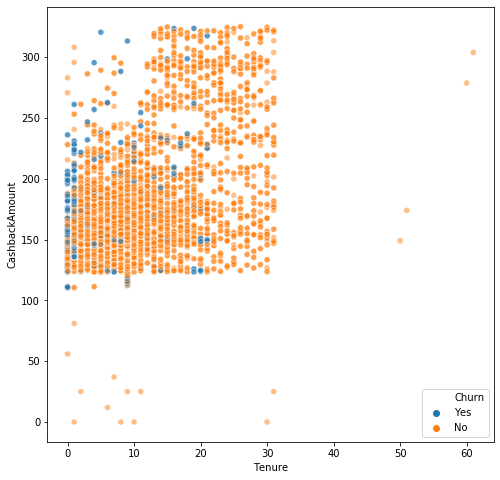

In [155]:
fig,axes = plt.subplots(figsize = (8,8))
sns.scatterplot(x = 'Tenure',y = 'CashbackAmount',data = df_2,hue = 'Churn',alpha=0.5)

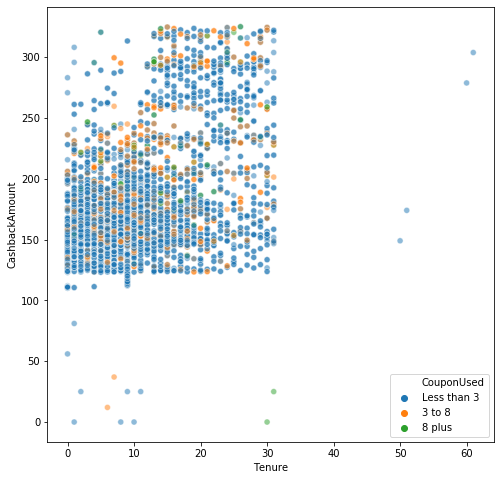

In [156]:
fig,axes = plt.subplots(figsize = (8,8))
sns.scatterplot(x = 'Tenure',y = 'CashbackAmount',data = df_2,hue = 'CouponUsed',alpha = 0.5)

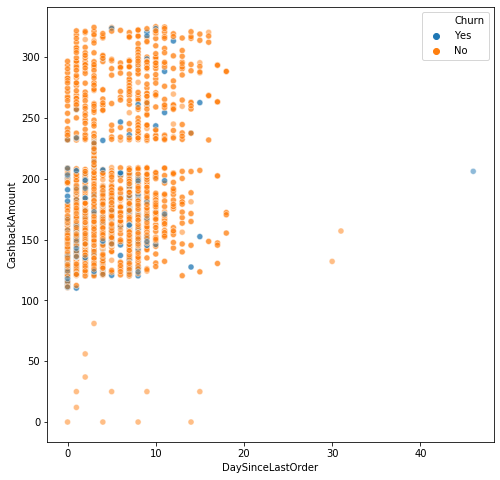

In [157]:
fig,axes = plt.subplots(figsize = (8,8))
sns.scatterplot(x = 'DaySinceLastOrder',y = 'CashbackAmount',data = df_2,hue = 'Churn',alpha=0.5)
# We can see that there are quite a few customers who have churned after ordering recently even after
# Recieving Cashback

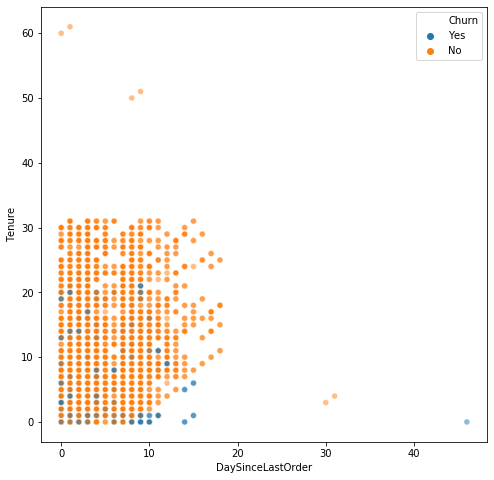

In [158]:
fig,axes = plt.subplots(figsize = (8,8))
sns.scatterplot(x = 'DaySinceLastOrder',y = 'Tenure',data = df_2,hue = 'Churn',alpha=0.5)
#Short stay customers

Text(0.5, 0.98, 'Cashback')

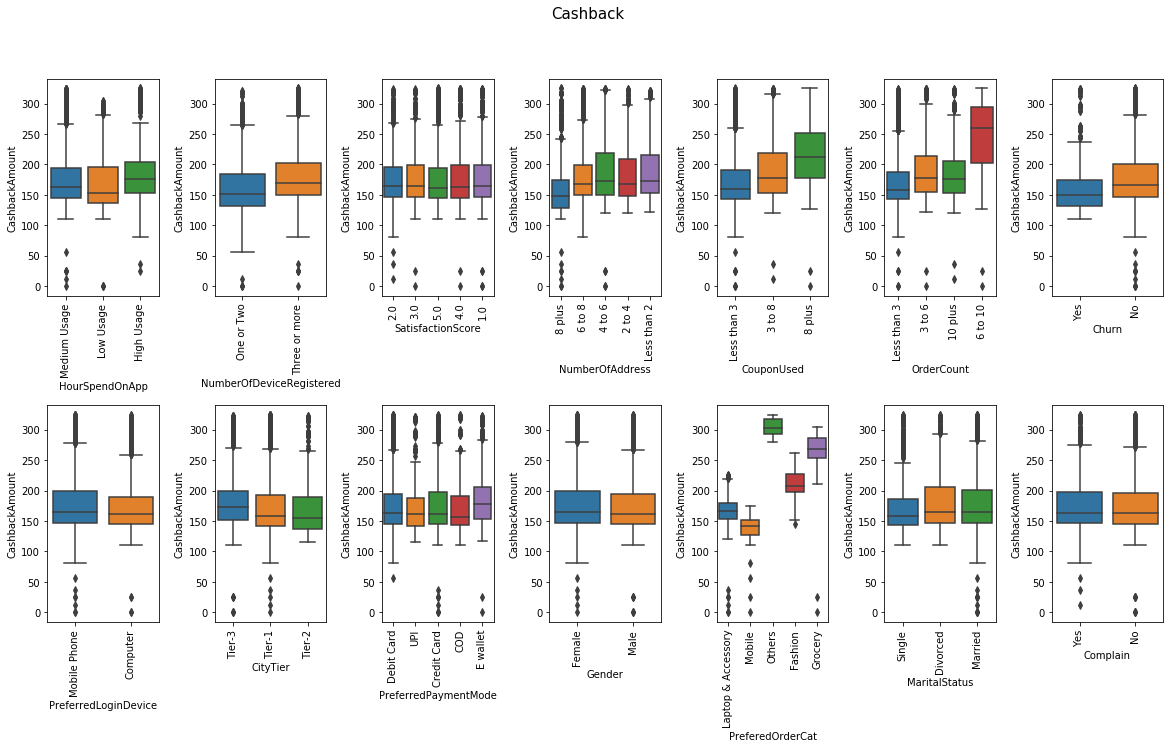

In [159]:
fig,axes = plt.subplots(2,7,figsize = (20,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
for i,j in zip(categorical_var,axes.flatten()):
    sns.boxplot(y = 'CashbackAmount',x = i,data = df_2,ax = j)
    j.set_xticklabels(df_2[i].unique(),rotation = 90)
fig.suptitle('Cashback',fontsize=15)

Text(0.5, 0.98, 'Days Since Last Order')

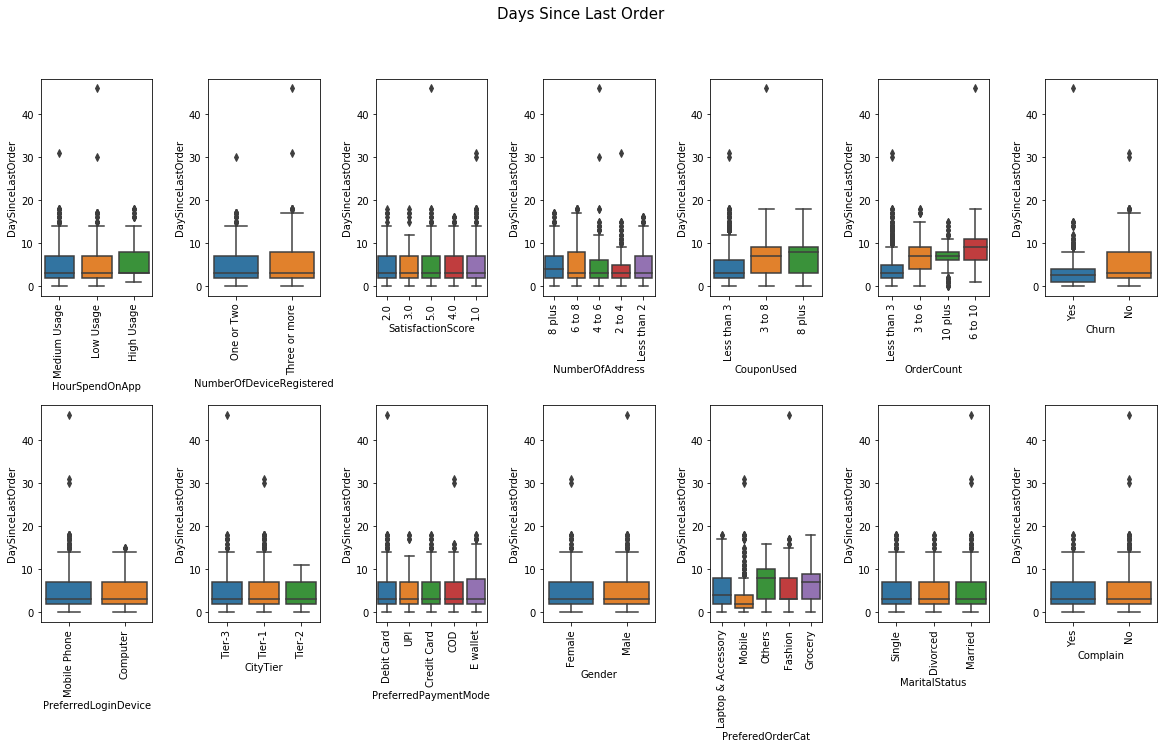

In [160]:
fig,axes = plt.subplots(2,7,figsize = (20,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
for i,j in zip(categorical_var,axes.flatten()):
    sns.boxplot(y = 'DaySinceLastOrder',x = i,data = df_2,ax = j)
    j.set_xticklabels(df_2[i].unique(),rotation = 90)
fig.suptitle('Days Since Last Order',fontsize=15)

Text(0.5, 0.98, 'Order Amount Hike From last Year')

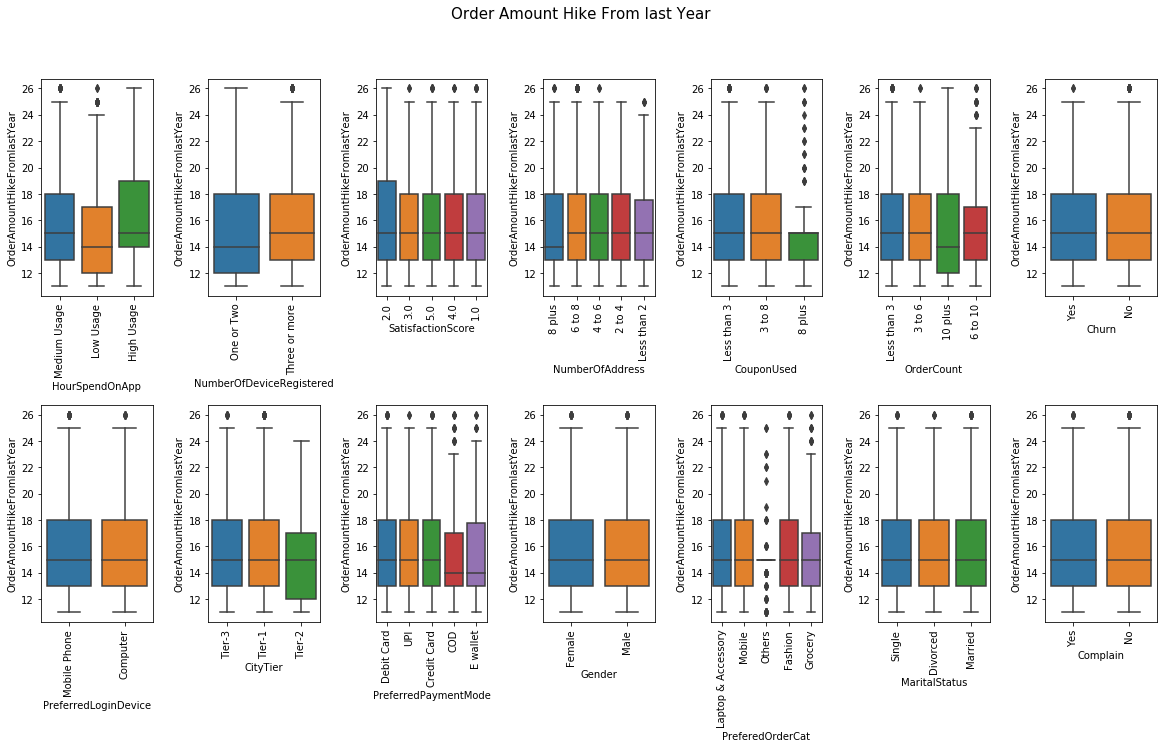

In [161]:
fig,axes = plt.subplots(2,7,figsize = (20,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
for i,j in zip(categorical_var,axes.flatten()):
    sns.boxplot(y = 'OrderAmountHikeFromlastYear',x = i,data = df_2,ax = j)
    j.set_xticklabels(df_2[i].unique(),rotation = 90)
fig.suptitle('Order Amount Hike From last Year',fontsize=15)

Text(0.5, 0.98, 'WarehouseToHome')

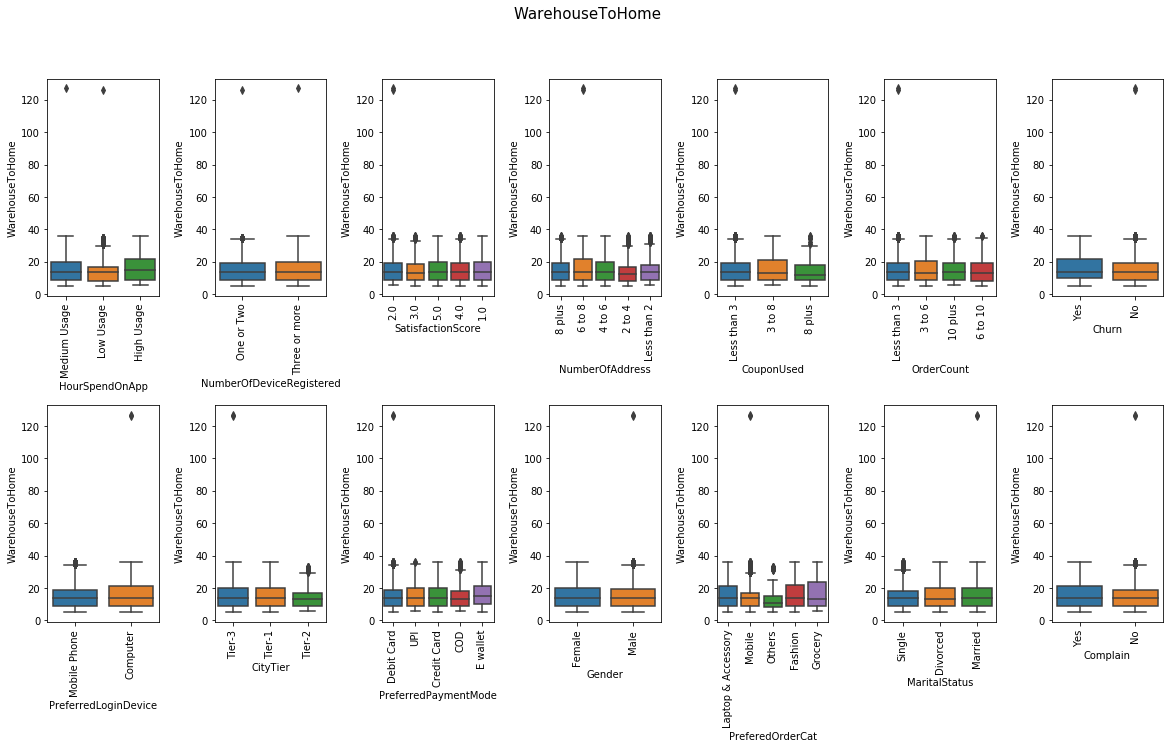

In [162]:
fig,axes = plt.subplots(2,7,figsize = (20,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
for i,j in zip(categorical_var,axes.flatten()):
    sns.boxplot(y = 'WarehouseToHome',x = i,data = df_2,ax = j)
    j.set_xticklabels(df_2[i].unique(),rotation = 90)
fig.suptitle('WarehouseToHome',fontsize=15)

Text(0.5, 0.98, 'Tenure')

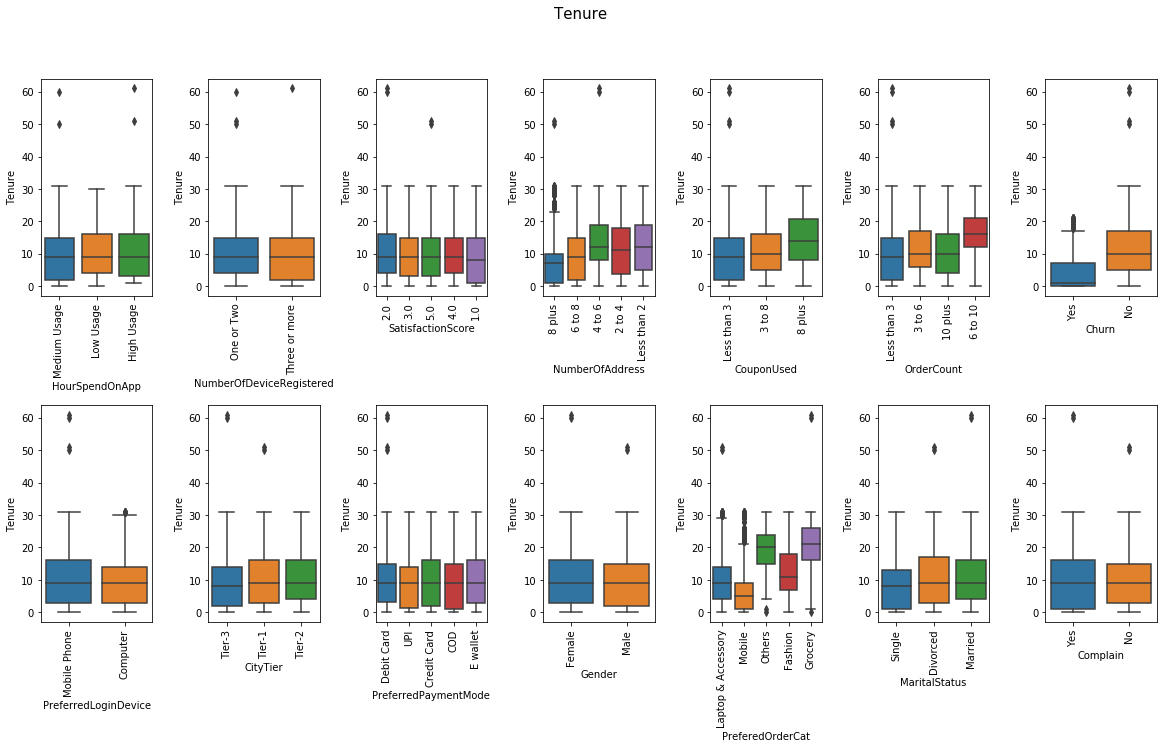

In [163]:
fig,axes = plt.subplots(2,7,figsize = (20,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
for i,j in zip(categorical_var,axes.flatten()):
    sns.boxplot(y = 'Tenure',x = i,data = df_2,ax = j)
    j.set_xticklabels(df_2[i].unique(),rotation = 90)
fig.suptitle('Tenure',fontsize=15)

Text(0.5, 0.98, 'Churn')

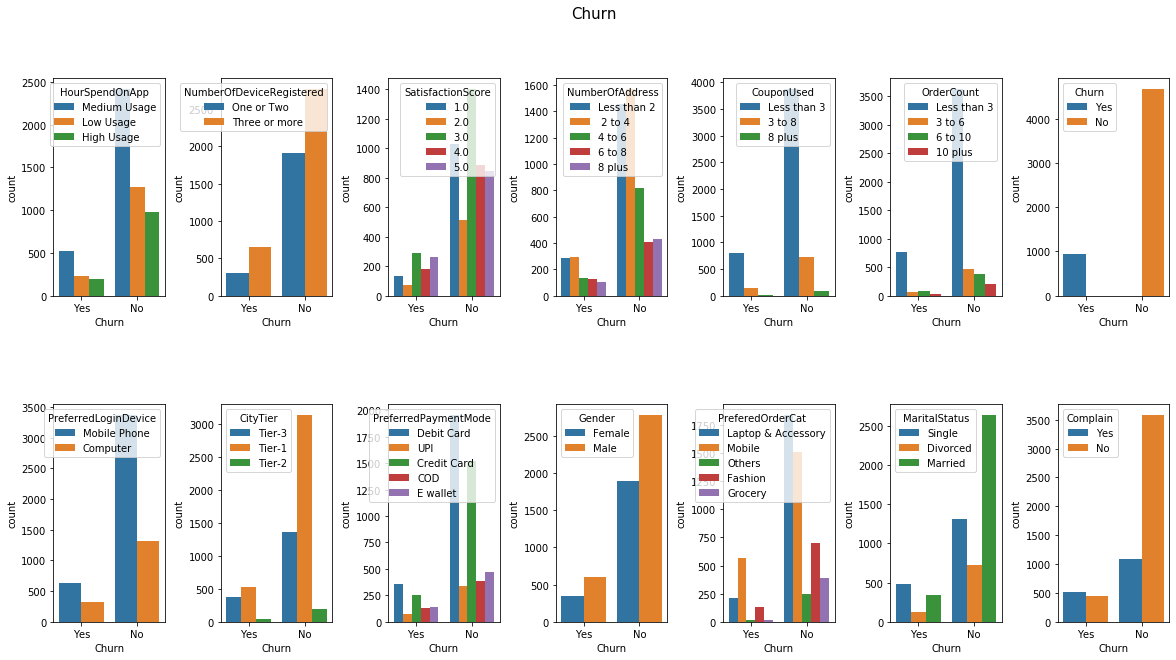

In [164]:
fig,axes = plt.subplots(2,7,figsize = (20,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
for i,j in zip(categorical_var,axes.flatten()):
    sns.countplot(x = 'Churn',hue = i,data = df_2,ax = j)
fig.suptitle('Churn',fontsize=15)

## Cluster Analysis

In [192]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [193]:
numerical_var

['Tenure',
 'WarehouseToHome',
 'OrderAmountHikeFromlastYear',
 'DaySinceLastOrder',
 'CashbackAmount']

In [194]:
for column in numerical_var:
    lr,ur=remove_outlier(df[column])
    df_2[column]=np.where(df_2[column]>ur,ur,df_2[column])
    df_2[column]=np.where(df_2[column]<lr,lr,df_2[column])

In [195]:
df_2_cat = df_2[categorical_var]
df_2_cat_dummies = pd.get_dummies(df_2_cat)
df_2_cat_dummies.head()
df_3 = pd.concat([df_2[numerical_var],df_2_cat_dummies],axis=1)

In [196]:
df_3.head()

,Tenure,WarehouseToHome,OrderAmountHikeFromlastYear,DaySinceLastOrder,CashbackAmount,HourSpendOnApp_High Usage,HourSpendOnApp_Low Usage,HourSpendOnApp_Medium Usage,NumberOfDeviceRegistered_One or Two,NumberOfDeviceRegistered_Three or more,...,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Complain_No,Complain_Yes
0,4.0,6.0,11.0,5.0,159.93,0,0,1,1,0,...,0,0,1,0,0,0,0,1,0,1
1,9.0,8.0,15.0,0.0,120.90,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,1
2,9.0,30.0,14.0,3.0,120.28,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,1
3,0.0,15.0,23.0,3.0,134.07,0,1,0,0,1,...,0,0,1,0,0,0,0,1,1,0
4,0.0,12.0,11.0,3.0,129.60,0,0,1,1,0,...,0,0,0,1,0,0,0,1,1,0


In [197]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
df_3_std = pd.DataFrame(std_scaler.fit_transform(df_3),columns = df_3.columns)
df_3_std.head()

,Tenure,WarehouseToHome,OrderAmountHikeFromlastYear,DaySinceLastOrder,CashbackAmount,HourSpendOnApp_High Usage,HourSpendOnApp_Low Usage,HourSpendOnApp_Medium Usage,NumberOfDeviceRegistered_One or Two,NumberOfDeviceRegistered_Three or more,...,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Complain_No,Complain_Yes
0,-0.733989,-1.146379,-1.301849,0.151436,-0.349346,-0.514669,-0.605123,0.955858,1.243990,-1.243990,...,-0.414657,-0.280257,1.321492,-0.765451,-0.221808,-0.421108,-1.062709,1.461076,-1.584290,1.584290
1,-0.135704,-0.906721,-0.187872,-1.249003,-1.235064,-0.514669,-0.605123,0.955858,-0.803865,0.803865,...,-0.414657,-0.280257,-0.756720,1.306419,-0.221808,-0.421108,-1.062709,1.461076,-1.584290,1.584290
2,-0.135704,1.729519,-0.466367,-0.408739,-1.249134,-0.514669,1.652558,-1.046181,-0.803865,0.803865,...,-0.414657,-0.280257,-0.756720,1.306419,-0.221808,-0.421108,-1.062709,1.461076,-1.584290,1.584290
3,-1.212618,-0.067917,2.040082,-0.408739,-0.936194,-0.514669,1.652558,-1.046181,-0.803865,0.803865,...,-0.414657,-0.280257,1.321492,-0.765451,-0.221808,-0.421108,-1.062709,1.461076,0.631198,-0.631198
4,-1.212618,-0.427405,-1.301849,-0.408739,-1.037633,-0.514669,-0.605123,0.955858,1.243990,-1.243990,...,-0.414657,-0.280257,-0.756720,1.306419,-0.221808,-0.421108,-1.062709,1.461076,0.631198,-0.631198


In [198]:
from sklearn.cluster import KMeans
SSD = []
for i in range(1,51):
    km = KMeans(n_clusters = i)
    km = km.fit(df_3_std)
    SSD.append(km.inertia_)

In [199]:
SSD

[287130.0,
 269641.9827634578,
 258050.70879687648,
 249410.20848166398,
 241523.61529776762,
 236071.95373304922,
 231845.9926817831,
 226995.43389487025,
 223637.03582732263,
 220979.1943235163,
 214942.21423555436,
 215675.7662321718,
 209625.09271103193,
 206331.50201510257,
 204734.88310807542,
 201973.14067834945,
 200220.9349872961,
 196899.07567671197,
 195727.52669028434,
 194877.0044901194,
 193153.44456018892,
 191553.98749060344,
 190738.9348743046,
 189637.5395996048,
 188827.08885414022,
 186795.54935420677,
 186268.4934606587,
 185497.22650175868,
 184917.97005693684,
 183858.53293321442,
 183065.58387888028,
 182025.44204019528,
 180924.1140431438,
 179900.9156857465,
 179692.34032992995,
 179150.30346499,
 178569.17556378077,
 178122.35574700832,
 176337.64824139816,
 176538.3439042119,
 175827.69215307455,
 174346.39530795751,
 174269.09219154017,
 172892.80728233748,
 173285.81801012083,
 172072.22386568197,
 172294.26667414067,
 171014.18950734532,
 170484.240228870

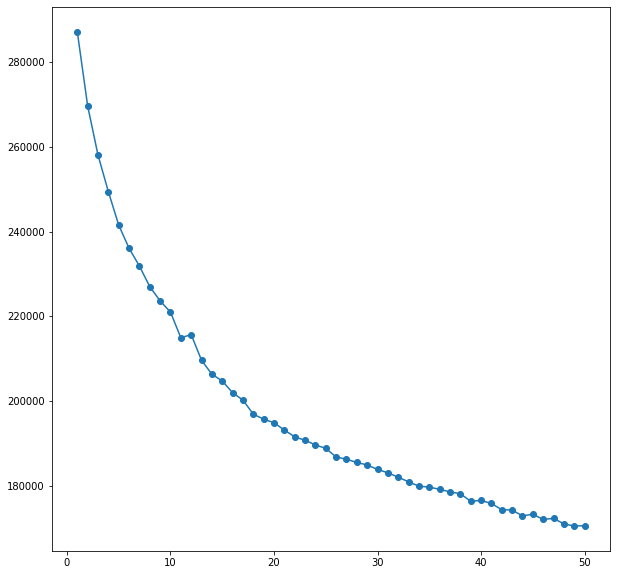

In [200]:
fig,axes = plt.subplots(figsize=(10,10))
plt.plot(range(1,51), SSD,marker='o')

In [201]:
km2 = KMeans(n_clusters = 5)
km2 = km2.fit(df_3_std)
df_2['Cluster'] = km2.labels_

In [202]:
df_2['Cluster'] = df_2['Cluster'].map({0:'Cluster-1',1:'Cluster-2',2:'Cluster-3',3:'Cluster-4',4:'Cluster-5'}) 

In [203]:
df_2.head()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus,Complain,Cluster
0,4.0,6.0,Medium Usage,One or Two,2,8 plus,11.0,Less than 3,Less than 3,5.0,159.93,Yes,Mobile Phone,Tier-3,Debit Card,Female,Laptop & Accessory,Single,Yes,Cluster-1
1,9.0,8.0,Medium Usage,Three or more,3,6 to 8,15.0,Less than 3,Less than 3,0.0,120.90,Yes,Mobile Phone,Tier-1,UPI,Male,Mobile,Single,Yes,Cluster-1
2,9.0,30.0,Low Usage,Three or more,3,4 to 6,14.0,Less than 3,Less than 3,3.0,120.28,Yes,Mobile Phone,Tier-1,Debit Card,Male,Mobile,Single,Yes,Cluster-1
3,0.0,15.0,Low Usage,Three or more,5,6 to 8,23.0,Less than 3,Less than 3,3.0,134.07,Yes,Mobile Phone,Tier-3,Debit Card,Male,Laptop & Accessory,Single,No,Cluster-1
4,0.0,12.0,Medium Usage,One or Two,5,2 to 4,11.0,Less than 3,Less than 3,3.0,129.60,Yes,Mobile Phone,Tier-1,Credit Card,Male,Mobile,Single,No,Cluster-1


In [204]:
df_2.Cluster.value_counts().sort_index()

Cluster-1     811
Cluster-2     635
Cluster-3     808
Cluster-4    1949
Cluster-5    1427
Name: Cluster, dtype: int64

In [205]:
clust_profile=df_2.groupby('Cluster').mean()
clust_profile['freq']=df_2.Cluster.value_counts().sort_index()
clust_profile

,Tenure,WarehouseToHome,OrderAmountHikeFromlastYear,DaySinceLastOrder,CashbackAmount,freq
Cluster,,,,,,
Cluster-1,3.377312,16.963009,15.651048,2.554871,153.580845,811
Cluster-2,20.766929,14.959055,15.236220,6.670866,264.308565,635
Cluster-3,10.517327,15.580446,15.974010,6.861386,181.835297,808
Cluster-4,9.845562,15.520267,15.939456,4.053874,169.651614,1949
Cluster-5,9.419762,15.099509,15.351787,3.751226,152.145402,1427


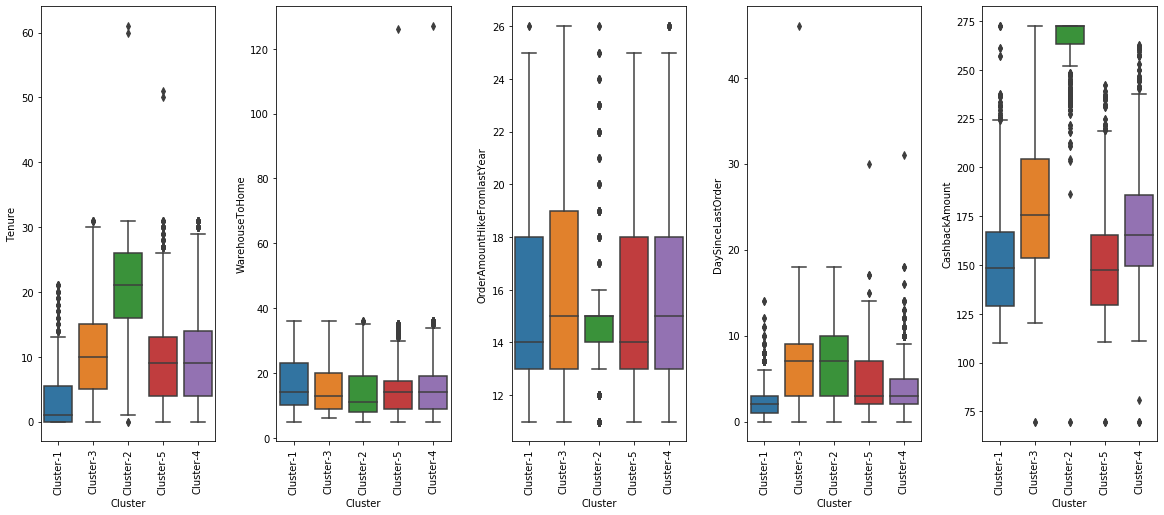

In [206]:
fig,axes = plt.subplots(1,5,figsize=(20,8))
plt.subplots_adjust(wspace=0.35)
for i,j in zip(numerical_var,axes):
    sns.boxplot(y = i,x = 'Cluster',data = df_2,ax = j)
    j.set_xticklabels(df_2['Cluster'].unique(),rotation = 90)

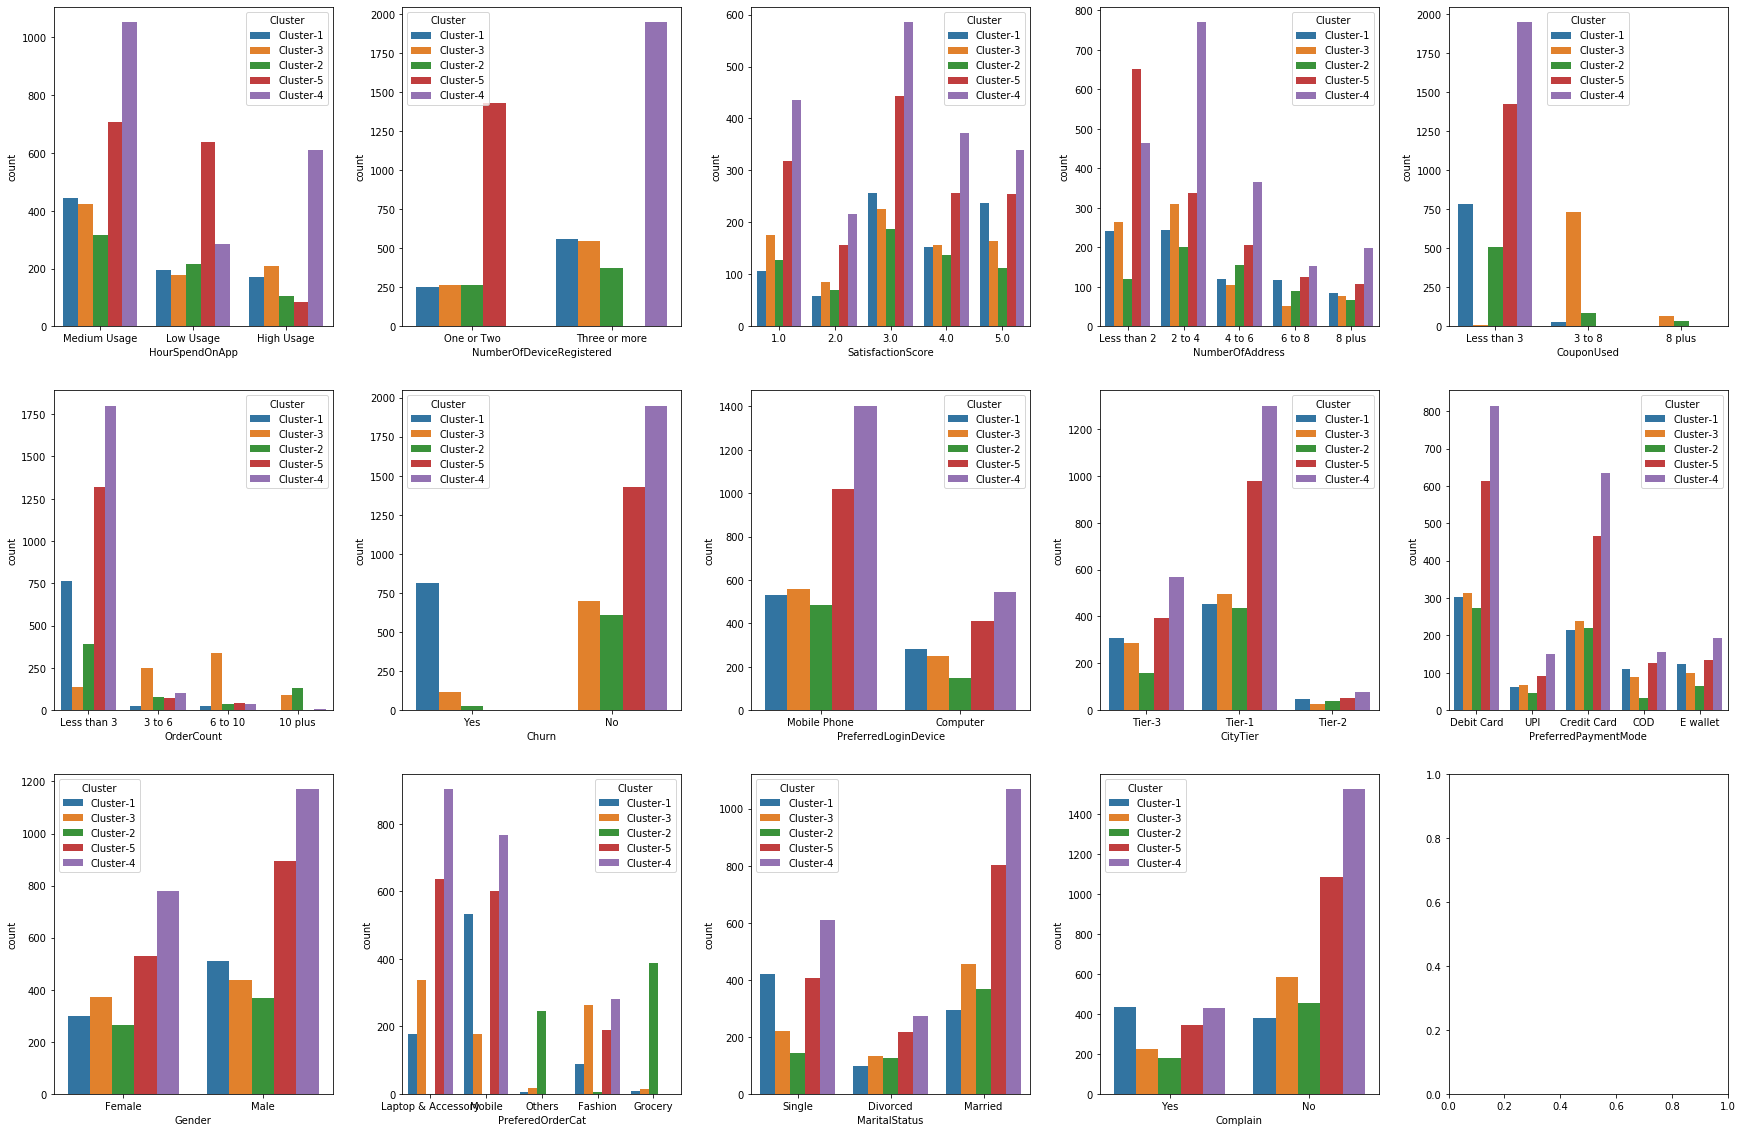

In [207]:
fig,axes = plt.subplots(3,5,figsize = (30,20))
plt.subplots_adjust(wspace = 0.25)
for i,j in zip(categorical_var,axes.flatten()):
    sns.countplot(df_2[i],hue = df_2['Cluster'],ax = j)

In [208]:
pd.crosstab(df_2['Churn'],columns = df_2['Cluster'])

Cluster,Cluster-1,Cluster-2,Cluster-3,Cluster-4,Cluster-5
Churn,,,,,
No,0,611,695,1949,1427
Yes,811,24,113,0,0


In [209]:
# - Cluster - 1 : New Comer & Churners
# - Cluster - 2 : Cashback Seekers 
# - Cluster - 3 : Frugal Users & Churners
# - Cluster - 4 : Tech Savvy Customers & Non - Churners  
# - Cluster - 5 : Mobile Enthusiasts & Non - Churners 